In [107]:
# Importing gc module
import gc
 
# Returns the number of
# objects it has collected
# and deallocated
collected = gc.collect()

collected

15519

In [5]:
!pip install -U category_encoders
!pip install -U yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [108]:
# import libraries
import pandas as pd
# use the following to suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import plotly.graph_objects as go


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

In [109]:
# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

In [110]:
# Import libraries

import plotly.express as px
import missingno as msno
from scipy.stats import skew, norm
from scipy import stats
from sklearn.model_selection import train_test_split
# from yellowbrick.regressor import ResidualsPlot


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.display.width = None

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
from scipy.stats import skew, norm

In [112]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score


In [113]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

## 1. Business problem/Real-world Problem

> **1.1 What is ELO?**

It is one of the biggest and most reliable payment brands in Brazil. It planned a reward program to attract customers. So, the frequency of using their payment brand has increased.


> **1.2 What is a loyalty Score?**

Loyalty is a numerical score calculated 2 months after the historical and evaluation period. It acts as a target feature in our training data.

> **1.3 Problem Statement**

Elo merchant category recommendation problem talks about the customer loyalty of credit cards for their users in Elo. In Brazil, it is one of the biggest and most reliable payment brands. This reward program is planned by the owners of a company to attract customers. So, the frequency of using their payment brand has increased. Basically, these programs make the customer’s choice more strongly towards the usage of Elo. It is also necessary that policies made by the companies are known to his customers. Here we have the loyalty score which is a numerical score calculated 2 months after the historical and evaluation period.

> **1.4 Real-world/Business objectives and constraints**

Here we predict loyalty scores to help the customers and also it helps reduce the unwanted campaign for Elo.
Here we use RMSE(Root-mean-square-error) for reducing the difference between predicted and actual rating(Regression problem).

## 2. Source of Data


Right now, Elo, one of the largest payment brands in Brazil, has built partnerships with merchants to offer promotions or discounts to cardholders. But do these promotions work for either the consumer or the merchant? Do customers enjoy their experience? Do merchants see repeat business? Personalization is key. Elo has built machine learning models to understand the most important aspects and preferences in their customers’ lifecycle, from food to shopping. But so far none of them is specifically tailored for an individual or profile. This is where you come in.

> **2.1 Data Overview:**

We have 6 dataset files for this problem. All the files are in CSV format.

* **Historical_transactions:** Contains up to 3 months of transactions for every card at any of the provided merchant_id’s.
* **Merchant:** contains the aggregate information for each merchant_id represented in the dataset.
* **New_merchant_transactions:** contains the transactions at new merchants(merchant_ids that this particular card_id has not yet visited) over a period of two months.
* **Userscore:** Contains 6 features, which is first_active_month, card_id, feature_1, feature_2, feature_3 and target.

> **What is a loyalty Score?** 

Loyalty is a numerical score calculated 2 months after the historical and evaluation period. It acts as a target feature in our training data.

### Question 1 

> **Q1.** Describe how you want to make use of merchants.csv, historical transactions.csv, and new merchant transactions.csv, for user loyalty prediction. Note, this is a very important question, you may want to update your whole pipeline multiple times to find the best usage of three files.

To create a single data frame that merges all four tables, we will follow these steps:

1. Concatenate the historical and numerical transaction tables.
2. Inner merge the concatenated table with the user score table.
3. Left merge the resulting table with the merchant table.

In more detail, the first step will combine the historical and numerical transaction tables into a single table. The second step will then merge this table with the user score table, keeping only the rows that exist in both tables. The third step will then merge the resulting table with the merchant table, keeping all of the rows from the first table and adding any new rows from the merchant table.

This process will create a single data frame that contains all of the data from the four original tables. This data frame can then be used for further analysis or visualization.

## Let's Start

In [1]:
!pip install -U yellowbrick
!pip install -U missingno
!pip install -U matplotlib_venn

  Attempting uninstall: missingno
    Found existing installation: missingno 0.4.1
    Uninstalling missingno-0.4.1:
      Successfully uninstalled missingno-0.4.1


In [2]:
# import libraries
import pandas as pd
# use the following to suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import plotly.graph_objects as go


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

In [3]:
# Import libraries

import plotly.express as px
import missingno as msno
from scipy.stats import skew, norm
from scipy import stats
from sklearn.model_selection import train_test_split
# from yellowbrick.regressor import ResidualsPlot


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.display.width = None

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


In [5]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

## Load Data

In [6]:
# Importing gc module
import gc
 
# Returns the number of
# objects it has collected
# and deallocated
collected = gc.collect()
collected

20

In [9]:
df_userscore = pd.read_csv('userscore.csv')  # User Score
df_hist_trans = pd.read_csv('historical_transactions.csv')
df_new_merchant_trans = pd.read_csv('new_merchant_transactions.csv')
df_merchant = pd.read_csv('merchants.csv')

## Exploar Data

In [ ]:
df_userscore.info()
df_new_merchant_trans.info()
df_hist_trans.info()
df_merchant.info()

In [9]:
df_userscore.head()
df_new_merchant_trans.head()
df_hist_trans.head()
df_merchant.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820
1,C_ID_3d0044924f,Jan-17,4,1,0,0.393
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.160


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.558,2018-03-11 14:57:36,1.000,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.570,2018-03-19 18:53:37,1.000,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551,2018-04-26 14:08:44,1.000,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.672,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.660,2018-03-22 21:07:53,NaN,-1,29


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,2017-06-25 15:33:07,1.000,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733,2017-07-15 12:10:45,1.000,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720,2017-08-09 22:04:29,1.000,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735,2017-09-02 10:06:26,1.000,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,2017-03-10 01:14:19,1.000,16,37


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057,-0.057,N,E,E,-0.400,...,-2.250,18.667,6,-2.320,13.917,12,N,242,9,1.000
1,M_ID_9339d880ad,3184,840,20,-0.057,-0.057,N,E,E,-0.720,...,-0.740,1.292,6,-0.570,1.688,12,N,22,16,1.000
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,...,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000
3,M_ID_a70e9c5f81,5026,792,9,-0.057,-0.057,Y,E,E,NaN,...,NaN,4.667,6,NaN,3.833,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057,-0.057,Y,E,E,NaN,...,NaN,0.361,6,NaN,0.347,12,Y,-1,-1,NaN


### Check Intersection between tables

In [10]:
common_values = set(df_userscore['card_id']).intersection(set(df_new_merchant_trans['card_id']))

# Count number of occurrences of common values in Column1
common_values_count_Column1 = df_userscore[df_userscore['card_id'].isin(common_values)]['card_id'].value_counts().sum()

# Count number of occurrences of common values in Column2
common_values_count_Column2 = df_new_merchant_trans[df_new_merchant_trans['card_id'].isin(common_values)]['card_id'].value_counts().sum()

# Display results
print("Number of common IDs:", len(common_values))
print("Number of occurrences of common IDs in df_userscore:", common_values_count_Column1)
print("Number of occurrences of common IDs in df_new_merchant_trans:", common_values_count_Column2)

Number of common IDs: 179986
Number of occurrences of common IDs in df_userscore: 179986
Number of occurrences of common IDs in df_new_merchant_trans: 1219685


In [11]:
common_values = set(df_userscore['card_id']).intersection(set(df_hist_trans['card_id']))

# Count number of occurrences of common values in Column1
common_values_count_Column1 = df_userscore[df_userscore['card_id'].isin(common_values)]['card_id'].value_counts().sum()

# Count number of occurrences of common values in Column2
common_values_count_Column2 = df_hist_trans[df_hist_trans['card_id'].isin(common_values)]['card_id'].value_counts().sum()

# Display results
print("Number of common IDs:", len(common_values))
print("Number of occurrences of common IDs in df_userscore:", common_values_count_Column1)
print("Number of occurrences of common IDs in df_hist_trans:", common_values_count_Column2)

Number of common IDs: 201917
Number of occurrences of common IDs in df_userscore: 201917
Number of occurrences of common IDs in df_hist_trans: 18030009


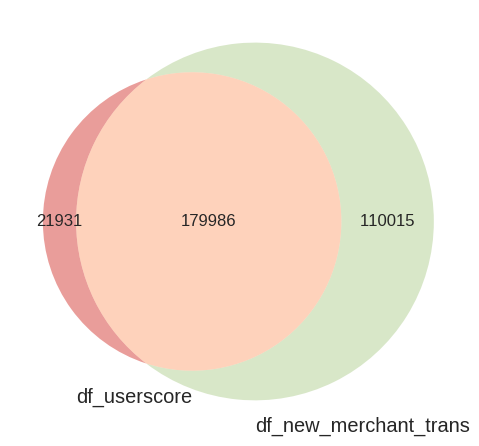

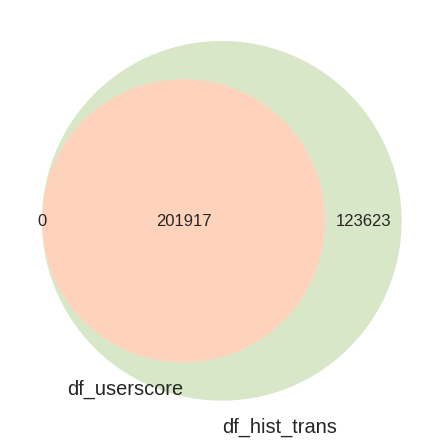

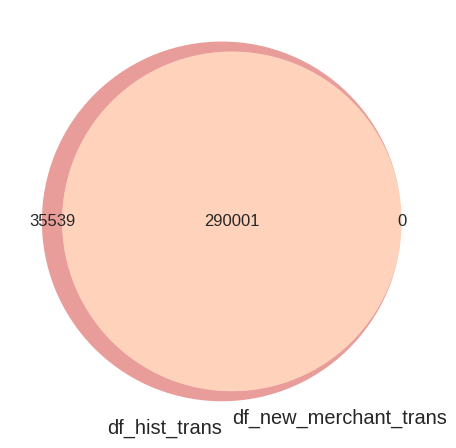

In [12]:
venn2([set(df_userscore['card_id']), set(df_new_merchant_trans['card_id'])],set_labels = ('df_userscore','df_new_merchant_trans'))
plt.show()


venn2([set(df_userscore['card_id']), set(df_hist_trans['card_id'])],set_labels = ('df_userscore','df_hist_trans'))
plt.show()


venn2([set(df_hist_trans['card_id']), set(df_new_merchant_trans['card_id'])],set_labels = ('df_hist_trans','df_new_merchant_trans'))
plt.show()

/opt/conda/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


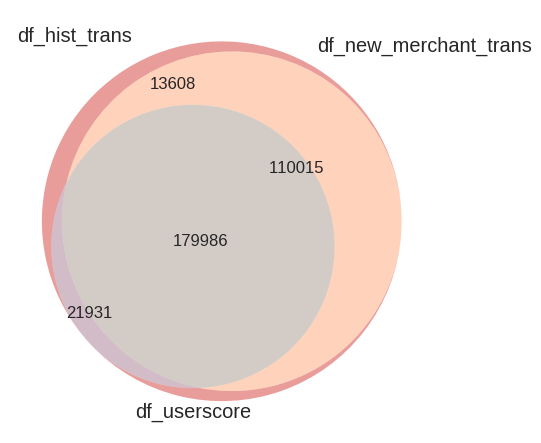

In [13]:
venn3([set(df_hist_trans['card_id']), set(df_new_merchant_trans['card_id']),set(df_userscore['card_id'])],set_labels = ('df_hist_trans','df_new_merchant_trans','df_userscore'))
plt.show()

> **So we can see that not all user in the transaction data exist in the user score data**

### Check Null Values

#### For df_userscore

In [14]:
missing_columns = df_userscore.isnull().sum()
missing_columns[missing_columns>0].sort_values(ascending=False)

Series([], dtype: int64)

#### For df_hist_trans

In [15]:
missing_columns = df_hist_trans.isnull().sum()
missing_columns[missing_columns>0].sort_values(ascending=False)

category_2      2652864
state_id        2652864
city_id         2478624
installments     178159
category_3       178159
merchant_id      138481
dtype: int64

In [16]:
missing_values = missing_columns[missing_columns>0]
# Get the total number of rows in the DataFrame
total_rows = df_hist_trans.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = missing_values / total_rows

# Sort the missing values by the percentage of missing values
missing_percentage.sort_values(ascending=False, inplace=True)

# # Print the top-3 most missed columns
# top_3_missing_columns = missing_percentage.head(3)

# Print the percentage of missing values for each column
for column in missing_percentage.index:
    print(column, "{0:.2%}".format(missing_percentage[column]))

# # Describe the columns
# for column in top_3_missing_columns.index:
#     print(all_data[column].describe())

category_2 9.11%
state_id 9.11%
city_id 8.51%
installments 0.61%
category_3 0.61%
merchant_id 0.48%


<Axes: >

/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:180: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


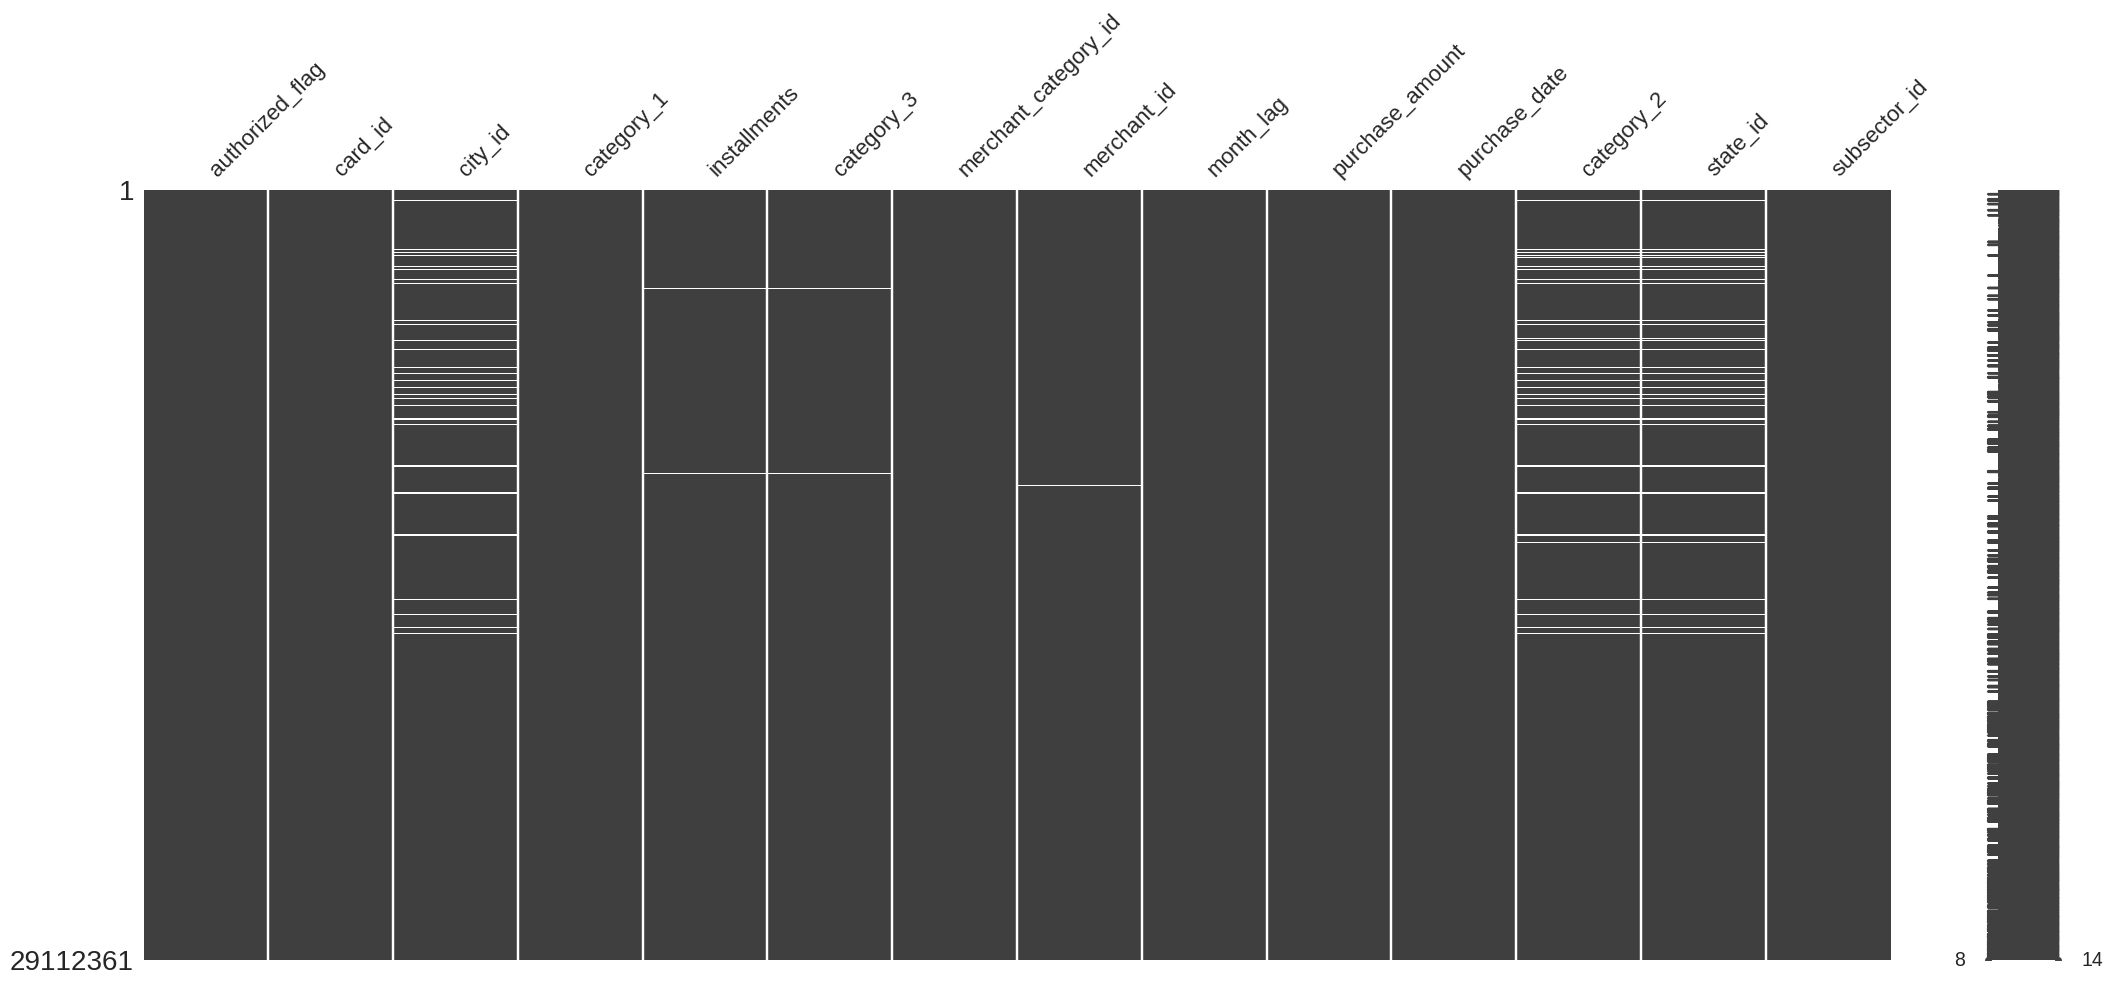

In [17]:
msno.matrix(df_hist_trans)

|Column|Null percentage|Missing value patterns|Missing value mechanism|Data Type|Reason|Solution|
| --- | --- | --- |--- |--- |---|---|
|merchant_id|0.48%| |MCAR|Object||Drop Null Values |
|category_3|0.61%| |MAR|Object|Both installments and category_3 have outliers in the same time|Most Frequent |
|category_2|9.11%| |MAR|Object|Both state_id and category_2 have outliers in the same time|Most Frequent |
|state_id| 9.11%| |MAR|Object|Both state_id and category_2 have outliers in the same time|Most Frequent |
|city_id| 8.51%| |MCAR|Object||Most Frequent |
|installments| 0.61%| |MAR|Object|Both installments and category_3 have outliers in the same time|Most Frequent |

#### For df_new_merchant_trans

In [19]:
missing_columns = df_new_merchant_trans.isnull().sum()
missing_columns[missing_columns>0].sort_values(ascending=False)

category_2      111745
state_id        111745
city_id          99349
installments     55922
category_3       55922
merchant_id      26216
dtype: int64

In [20]:
missing_values = missing_columns[missing_columns>0]
# Get the total number of rows in the DataFrame
total_rows = df_new_merchant_trans.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = missing_values / total_rows

# Sort the missing values by the percentage of missing values
missing_percentage.sort_values(ascending=False, inplace=True)

# # Print the top-3 most missed columns
# top_3_missing_columns = missing_percentage.head(3)

# Print the percentage of missing values for each column
for column in missing_percentage.index:
    print(column, "{0:.2%}".format(missing_percentage[column]))

# # Describe the columns
# for column in top_3_missing_columns.index:
#     print(all_data[column].describe())

category_2 5.69%
state_id 5.69%
city_id 5.06%
installments 2.85%
category_3 2.85%
merchant_id 1.34%


<Axes: >

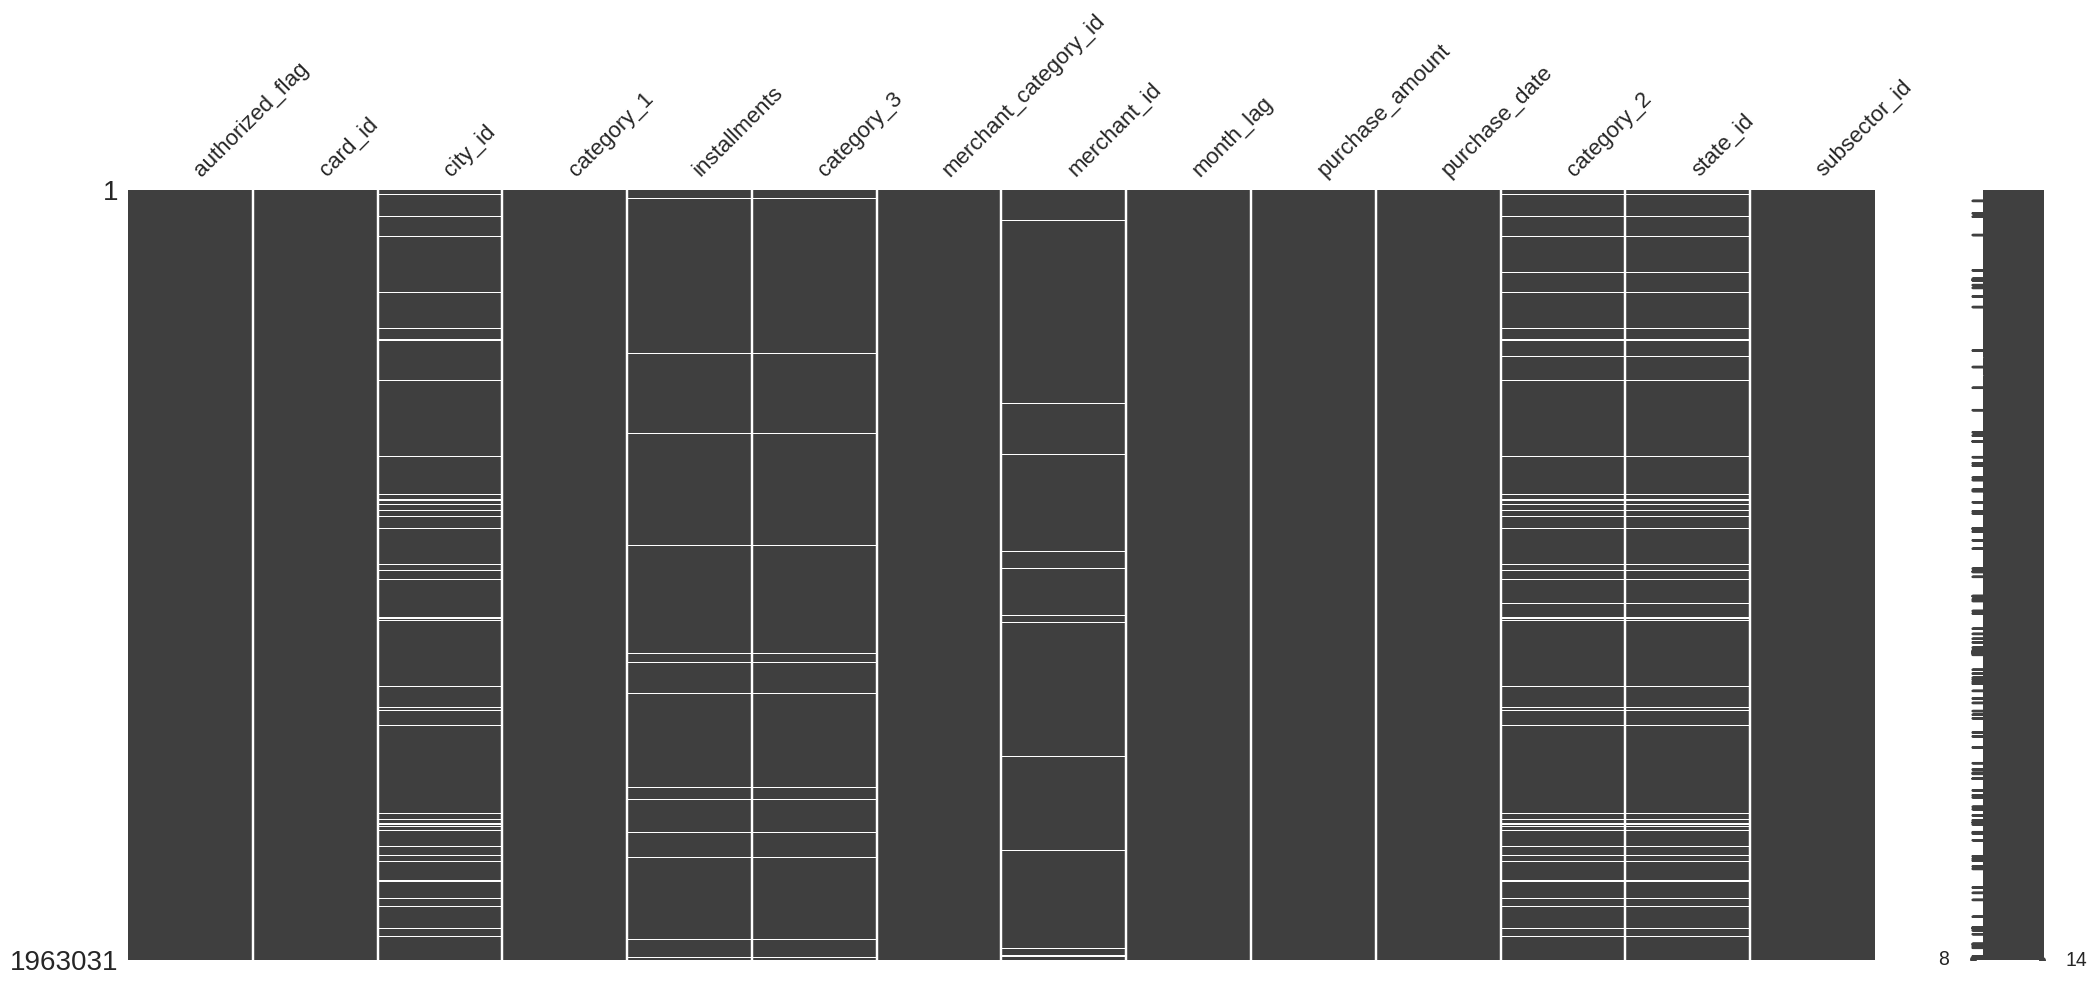

In [21]:
msno.matrix(df_new_merchant_trans)

|Column|Null percentage|Missing value patterns|Missing value mechanism|Data Type|Reason|Solution|
| --- | --- | --- |--- |--- |---|---|
|merchant_id|1.34%| |MCAR|Object||Drop Null Values |
|category_3|2.85%| |MCAR|Object|Both installments and category_3 have outliers in the same time|Most Frequent |
|category_2|5.69%||MCAR|Object|Both state_id and category_2 have outliers in the same time|Most Frequent |
|state_id| 5.69%| |MCAR|Object|Both state_id and category_2 have outliers in the same time|Most Frequent |
|city_id| 5.06%| |MCAR|Object||Most Frequent |
|installments| 2.85%| |MCAR|Object|Both installments and category_3 have outliers in the same time|Most Frequent |

**Note, The Nulls in state_id,city_id, and installments  appear because we replace outliers with null values.** 

#### For df_merchant

In [21]:
missing_columns = df_merchant.isnull().sum()
missing_columns[missing_columns>0].sort_values(ascending=False)

category_2         11887
avg_sales_lag3        13
avg_sales_lag6        13
avg_sales_lag12       13
dtype: int64

In [22]:
missing_values = missing_columns[missing_columns>0]
# Get the total number of rows in the DataFrame
total_rows = df_new_merchant_trans.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = missing_values / total_rows

# Sort the missing values by the percentage of missing values
missing_percentage.sort_values(ascending=False, inplace=True)

# # Print the top-3 most missed columns
# top_3_missing_columns = missing_percentage.head(3)

# Print the percentage of missing values for each column
for column in missing_percentage.index:
    print(column, "{0:.2%}".format(missing_percentage[column]))

# # Describe the columns
# for column in top_3_missing_columns.index:
#     print(all_data[column].describe())

category_2 0.61%
avg_sales_lag3 0.00%
avg_sales_lag6 0.00%
avg_sales_lag12 0.00%


<Axes: >

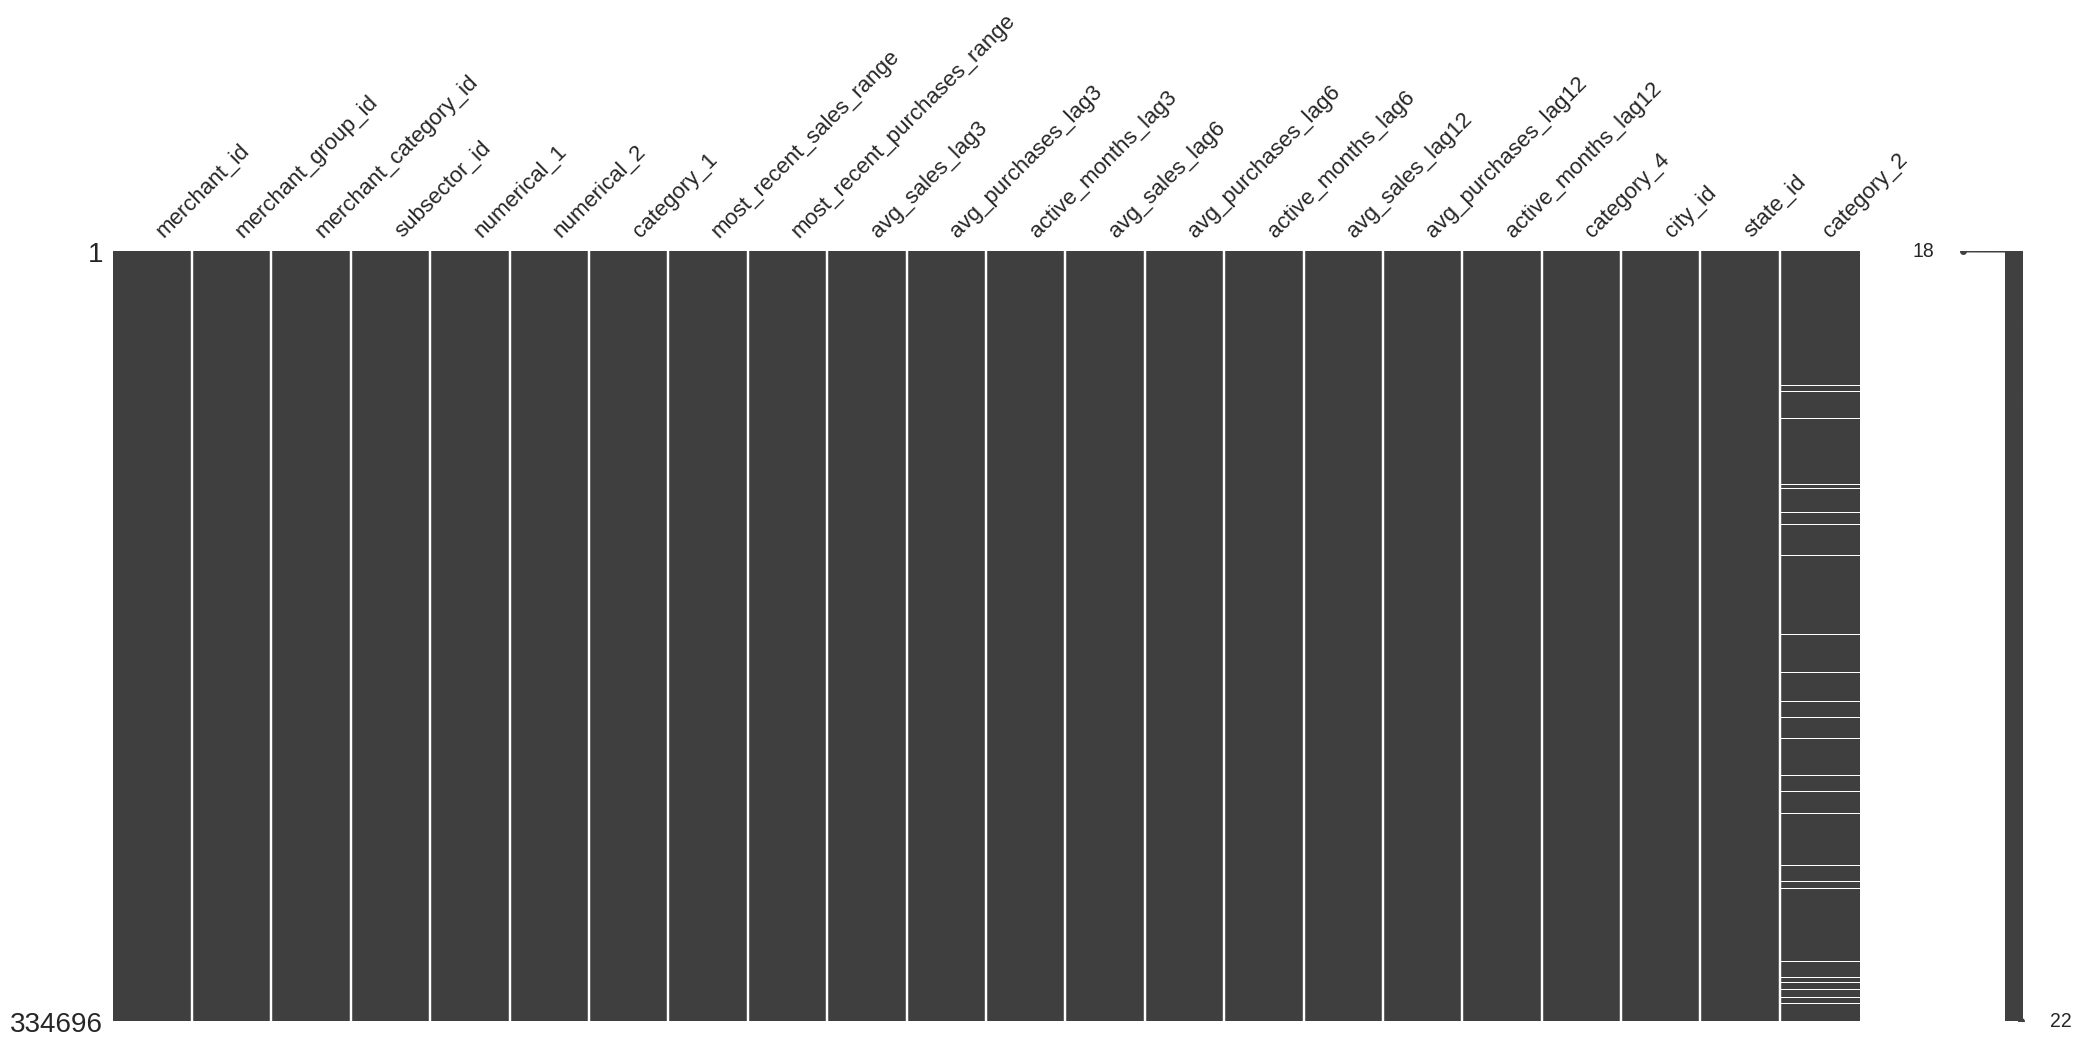

In [23]:
msno.matrix(df_merchant)

|Column|Null percentage|Missing value patterns|Missing value mechanism|Data Type|Solution|
| --- | --- | --- |--- |--- |---|
|avg_sales_lag12 |0.00%| |MCAR|Object|Mean |
|avg_sales_lag6 |0.00%| |MCAR|Object|Mean|
|avg_sales_lag3 |0.00%| |MCAR|Object|Mean|
|category_2|0.61%||MCAR|Object|Most Frequent |

> **From above we can see that the three tables hist_trans,new_merchant_trans,merchant all of them have null values in some columns** 

#### 1. For df_hist_trans

|Column|Null percentage|Missing value patterns|Missing value mechanism|Data Type|Solution|
| --- | --- | --- |--- |--- |---|
|merchant_id|0.48%|General Pattern |MCAR|Object|Drop Null Values |
|category_3|0.61%|General Pattern |MCAR|Object|Most Frequent |
|category_2|9.11%|General Pattern|MCAR|Object|Most Frequent |


#### 2. For df_new_merchant_trans

|Column|Null percentage|Missing value patterns|Missing value mechanism|Data Type|Solution|
| --- | --- | --- |--- |--- |---|
|merchant_id|1.34%|General Pattern |MCAR|Object|Drop Null Values |
|category_3|2.85%|General Pattern |MCAR|Object|Most Frequent |
|category_2|5.69%|General Pattern|MCAR|Object|Most Frequent |


#### 3. For df_merchant

|Column|Null percentage|Missing value patterns|Missing value mechanism|Data Type|Solution|
| --- | --- | --- |--- |--- |---|
|avg_sales_lag12 |0.00%|General Pattern |MCAR|Object|Mean |
|avg_sales_lag6 |0.00%|General Pattern |MCAR|Object|Mean|
|avg_sales_lag3 |0.00%|General Pattern |MCAR|Object|Mean|
|category_2|0.61%|General Pattern|MCAR|Object|Most Frequent |


**The above tables descripe the Missing value patterns & Missing value mechanism for the columns that have Null values.**


### check inf values

In [24]:
ds = df_merchant.isin([np.inf, -np.inf])
print(ds.sum())

print('----'*30)

ds = df_hist_trans.isin([np.inf, -np.inf])
print(ds.sum())

print('----'*30)

ds = df_userscore.isin([np.inf, -np.inf])
print(ds.sum())

print('----'*30)

ds = df_new_merchant_trans.isin([np.inf, -np.inf])
print(ds.sum())

merchant_id                    0
merchant_group_id              0
merchant_category_id           0
subsector_id                   0
numerical_1                    0
numerical_2                    0
category_1                     0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             3
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             3
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            3
active_months_lag12            0
category_4                     0
city_id                        0
state_id                       0
category_2                     0
dtype: int64
------------------------------------------------------------------------------------------------------------------------
authorized_flag         0
card_id                 0
city_id                 0
category_1              0
installments            0
category_3

### **Check outliers in the data** 

In [25]:
def has_outliers(df, column):
    first_quartile = df[column].quantile(0.25)
    third_quartile = df[column].quantile(0.75)
    interquartile_range = third_quartile - first_quartile

    # Identify the outliers for the column
    lower = first_quartile - 1.5 * interquartile_range
    upper = third_quartile + 1.5 * interquartile_range
    outliers_data = df[column].loc[(df[column] < lower) | (df[column] > upper)]

    # Check if there are any outliers
    if any(outliers_data):
        # df.loc[outliers_data.index, :] = first_quartile if outliers_data < first_quartile else third_quartile
        print('There are outliers in the {} column count {:,}'.format(column, outliers_data.shape[0]))
    else:
        print('There are no outliers in the {} column'.format(column))

In [26]:

def get_outlier_bounds(df, col_name):
    # Compute the first and third quartiles and the interquartile range
    first_quartile = df[col_name].quantile(0.25)
    third_quartile = df[col_name].quantile(0.75)
    interquartile_range = third_quartile - first_quartile

    # Compute the lower and upper bounds for outliers
    lower = first_quartile - 1.5 * interquartile_range
    upper = third_quartile + 1.5 * interquartile_range
    
    return (lower, upper)

#### For df_userscore

In [27]:
df_userscore.describe()

,feature_1,feature_2,feature_3,score
count,201917.000,201917.000,201917.000,201917.000
mean,3.105,1.745,0.566,-0.394
std,1.186,0.751,0.496,3.850
min,1.000,1.000,0.000,-33.219
25%,2.000,1.000,0.000,-0.883
50%,3.000,2.000,1.000,-0.023
75%,4.000,2.000,1.000,0.765
max,5.000,3.000,1.000,17.965


In [28]:
num_cols = df_userscore.select_dtypes(include=['int64', 'float64']).columns.tolist()
for column in num_cols:
    has_outliers(df_userscore, column)

There are no outliers in the feature_1 column
There are no outliers in the feature_2 column
There are no outliers in the feature_3 column
There are outliers in the score column count 15,397


In [29]:
high_positave  = df_userscore[(df_userscore['score'] >= 1)]
low_negative  = df_userscore[(df_userscore['score'] < -1)]

percentageNeg = (low_negative.shape[0] / df_userscore.shape[0]) 
percentagePos = (high_positave.shape[0] / df_userscore.shape[0]) 

print('Percentage of data that is higher than 1  is {0:.2%}'.format(percentagePos))
print('Percentage of data that is lower than -1 is {0:.2%}'.format(percentageNeg))


Percentage of data that is higher than 1  is 20.31%
Percentage of data that is lower than -1 is 22.61%


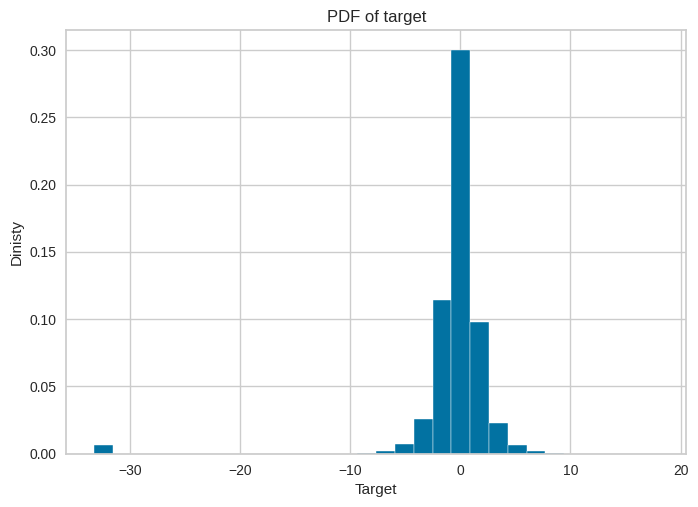

In [30]:
# generate a histogram of the 'age' column
fig = plt.hist(df_userscore['score'],density=True, bins=30)
x = plt.xlabel('Target')
x = plt.ylabel('Dinisty')
x = plt.title('PDF of target')
plt.show()

#### For df_hist_trans

In [31]:
df_hist_trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,29112361.000,29112361.000,29112361.000,29112361.000,29112361.000,26459497.000,29112361.000,29112361.000
mean,129.326,0.648,481.013,-4.487,0.036,2.195,10.567,26.848
std,104.256,2.796,249.376,3.589,1123.522,1.532,6.367,9.693
min,-1.000,-1.000,-1.000,-13.000,-0.747,1.000,-1.000,-1.000
25%,53.000,0.000,307.000,-7.000,-0.720,1.000,9.000,19.000
50%,90.000,0.000,454.000,-4.000,-0.688,1.000,9.000,29.000
75%,212.000,1.000,705.000,-2.000,-0.603,3.000,16.000,34.000
max,347.000,999.000,891.000,0.000,6010603.972,5.000,24.000,41.000


In [32]:
num_cols = df_hist_trans.select_dtypes(include=['int8','int16','int64', 'float64']).columns.tolist()
for column in num_cols:
    has_outliers(df_hist_trans, column)

There are no outliers in the city_id column
There are outliers in the installments column count 1,178,517
There are no outliers in the merchant_category_id column
There are no outliers in the month_lag column
There are outliers in the purchase_amount column count 2,907,482
There are no outliers in the category_2 column
There are no outliers in the state_id column
There are no outliers in the subsector_id column


<Figure size 2000x1000 with 0 Axes>

<Axes: >

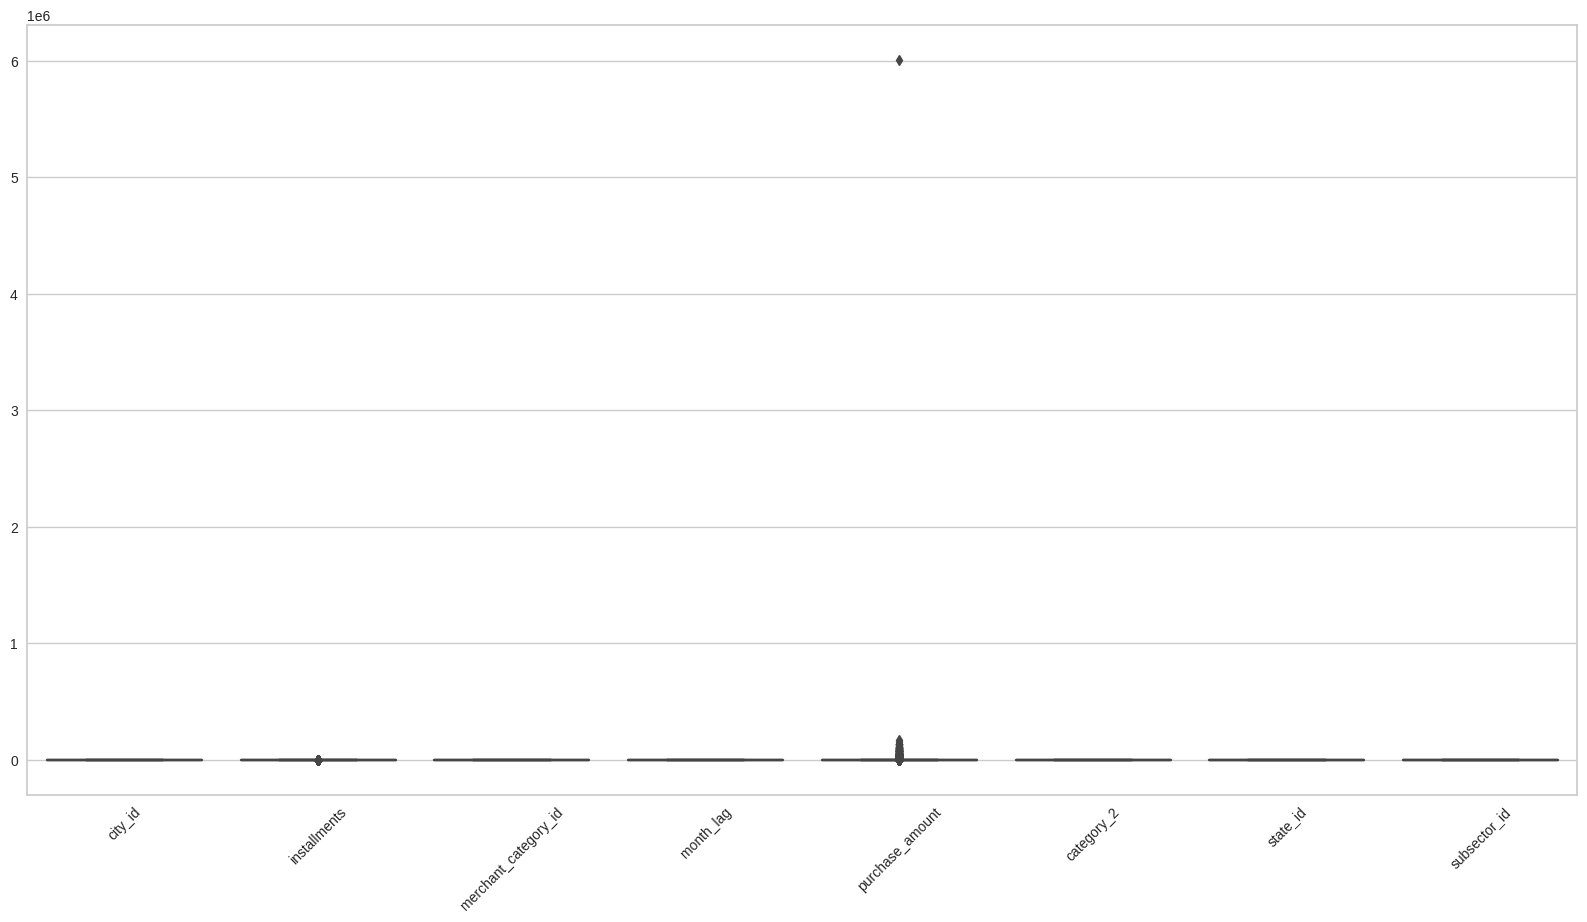

In [33]:

plt.figure(figsize=(20,10))

sns.boxplot(data=df_hist_trans)
x = plt.xticks(rotation=45)


<Axes: xlabel='installments'>

Text(0.5, 0, 'installments')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Value Counts of installments')

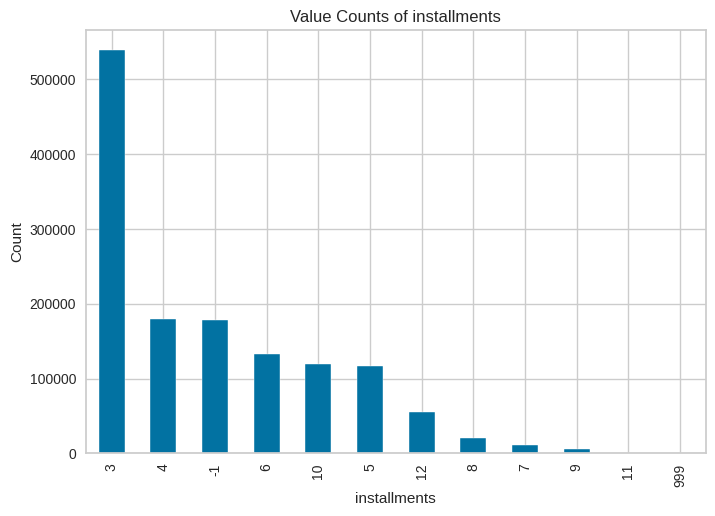

In [34]:
low_negative  = df_hist_trans[(df_hist_trans['installments'] > 2.5)|(df_hist_trans['installments'] <0 )]

# Assuming df_new_merchant_trans is your pandas dataframe
installments_vc = low_negative.installments.value_counts()
installments_vc.plot.bar()
plt.xlabel('installments')
plt.ylabel('Count')
plt.title('Value Counts of installments')
plt.show()

> **What we will do with insatllments = 999? We will replace it with 11**

> **What we will do with insatllments = -1? the may indcation that the user did not his last insallment**

#### For df_new_merchant_trans

In [35]:
df_new_merchant_trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1963031.000,1963031.000,1963031.000,1963031.000,1963031.000,1851286.000,1963031.000,1963031.000
mean,134.387,0.683,430.970,1.477,-0.551,2.198,10.881,25.976
std,101.515,1.584,246.339,0.499,0.694,1.528,6.039,10.129
min,-1.000,-1.000,-1.000,1.000,-0.747,1.000,-1.000,-1.000
25%,69.000,0.000,278.000,1.000,-0.717,1.000,9.000,19.000
50%,110.000,1.000,367.000,1.000,-0.675,1.000,9.000,29.000
75%,212.000,1.000,683.000,2.000,-0.582,3.000,15.000,34.000
max,347.000,999.000,891.000,2.000,263.157,5.000,24.000,41.000


In [36]:
num_cols = df_new_merchant_trans.select_dtypes(include=['int8','int16','int64', 'float64']).columns.tolist()
for column in num_cols:
    has_outliers(df_new_merchant_trans, column)

There are no outliers in the city_id column
There are outliers in the installments column count 93,958
There are no outliers in the merchant_category_id column
There are no outliers in the month_lag column
There are outliers in the purchase_amount column count 200,708
There are no outliers in the category_2 column
There are outliers in the state_id column count 111,745
There are no outliers in the subsector_id column


<Axes: xlabel='installments'>

Text(0.5, 0, 'Installments')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Value Counts of Installments')

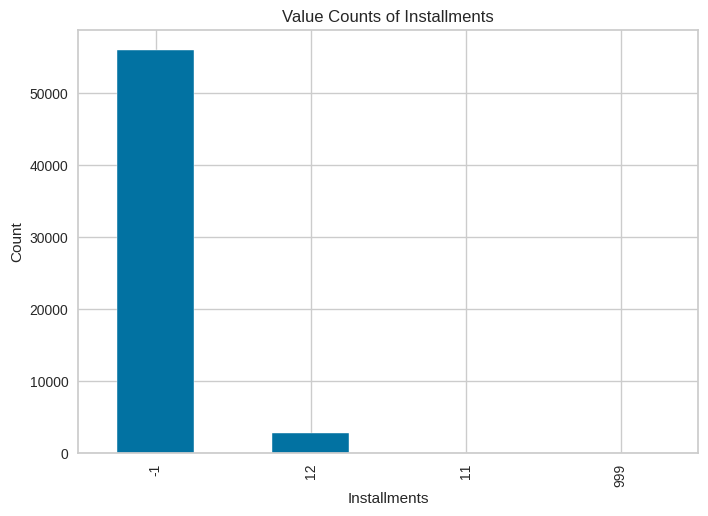

In [37]:
low_negative  = df_new_merchant_trans[(df_new_merchant_trans['installments'] < 0) |(df_new_merchant_trans['installments'] > 10) ]

# Assuming df_new_merchant_trans is your pandas dataframe
installments_vc = low_negative.installments.value_counts()
installments_vc.plot.bar()
plt.xlabel('Installments')
plt.ylabel('Count')
plt.title('Value Counts of Installments')
plt.show()

> **What we will do with insatllments = 999? We will replace it with 11**

> **What we will do with insatllments = -1? the may indcation that the user did not his last insallment**

<Figure size 1000x500 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'purchase_amount')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Value Counts of purchase_amount')

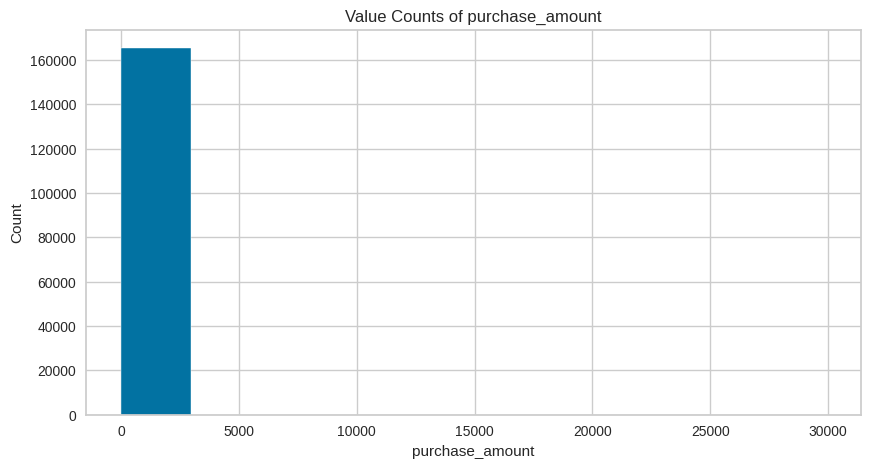

In [38]:
low_negative  = df_hist_trans[(df_hist_trans['purchase_amount'] > 0)]

# Assuming df_new_merchant_trans is your pandas dataframe
purchase_amount_vc = low_negative.purchase_amount.value_counts()
plt.figure(figsize = (10,5))
purchase_amount_vc.plot.hist()
plt.xlabel('purchase_amount')
plt.ylabel('Count')
plt.title('Value Counts of purchase_amount')
plt.show()

> **What we will do with purchase amount higher than 10? We will not change any thing in these columns as higher purchase amount is a real data not just an noise and it have meaning value we do not wont to lose it**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'purchase_amount')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Value Counts of purchase_amount')

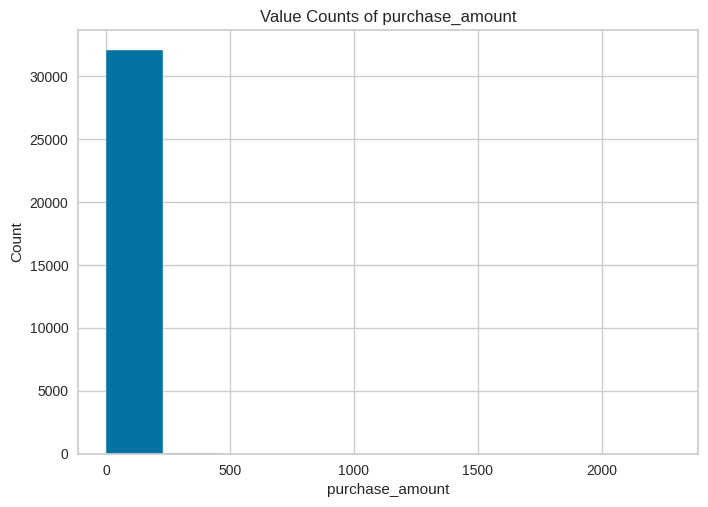

In [39]:
low_negative  = df_new_merchant_trans[(df_new_merchant_trans['purchase_amount'] > 0)  ]

# Assuming df_new_merchant_trans is your pandas dataframe
purchase_amount_vc = low_negative.purchase_amount.value_counts()
purchase_amount_vc.plot.hist()
plt.xlabel('purchase_amount')
plt.ylabel('Count')
plt.title('Value Counts of purchase_amount')
plt.show()

> **What we will do with purchase amount higher than 10? We will not change any thing in these columns as higher purchase amount is a real data not just an nise and it have meaning value we do not wont to lose it**

<Axes: xlabel='state_id'>

Text(0.5, 0, 'state_id')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Value Counts of state_id')

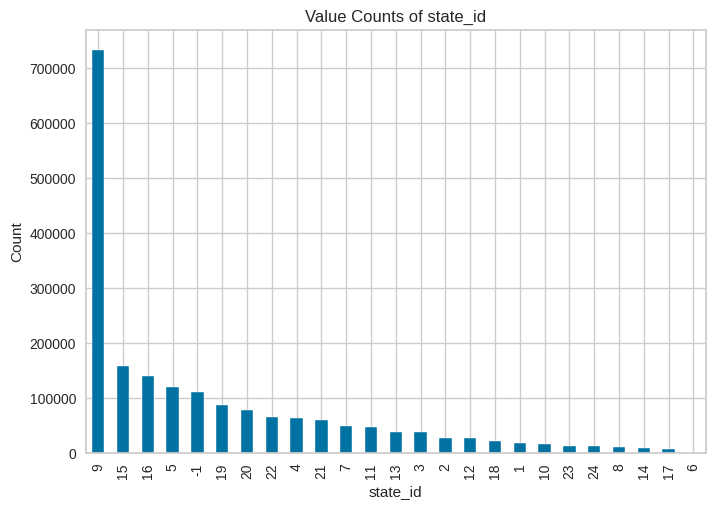

In [40]:
low_negative  = df_new_merchant_trans[(df_new_merchant_trans['state_id'] < 0)  ]

# Assuming df_new_merchant_trans is your pandas dataframe
purchase_amount_vc = df_new_merchant_trans.state_id.value_counts()
purchase_amount_vc.plot.bar()
plt.xlabel('state_id')
plt.ylabel('Count')
plt.title('Value Counts of state_id')
plt.show()

> **What we will do with state id = -1? We will replace it with 0**

#### For df_merchant

In [41]:
df_merchant.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000,334696.000,334696.000,334696.000,334696.000,334683.000,334696.000,334696.000,334683.000,334696.000,334696.000,334683.000,334696.000,334696.000,334696.000,334696.000,322809.000
mean,31028.736,423.132,25.116,0.011,0.008,13.833,inf,2.994,21.651,inf,5.947,25.228,inf,11.599,102.918,11.861,2.380
std,31623.043,252.898,9.807,1.098,1.070,2395.490,NaN,0.095,3947.108,NaN,0.395,5251.842,NaN,1.520,107.091,6.177,1.563
min,1.000,-1.000,-1.000,-0.057,-0.057,-82.130,0.333,1.000,-82.130,0.167,1.000,-82.130,0.098,1.000,-1.000,-1.000,1.000
25%,3612.000,222.000,19.000,-0.057,-0.057,0.880,0.924,3.000,0.850,0.902,6.000,0.850,0.898,12.000,-1.000,9.000,1.000
50%,19900.000,373.000,27.000,-0.057,-0.057,1.000,1.017,3.000,1.010,1.027,6.000,1.020,1.043,12.000,69.000,9.000,2.000
75%,51707.250,683.000,33.000,-0.048,-0.048,1.160,1.147,3.000,1.230,1.216,6.000,1.290,1.266,12.000,182.000,16.000,4.000
max,112586.000,891.000,41.000,183.735,182.079,851844.640,inf,3.000,1513959.000,inf,6.000,2567408.000,inf,12.000,347.000,24.000,5.000


In [42]:
num_cols = df_merchant.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [43]:
for column in num_cols:
    has_outliers(df_merchant, column)

There are no outliers in the merchant_group_id column
There are no outliers in the merchant_category_id column
There are no outliers in the subsector_id column
There are outliers in the numerical_1 column count 48,691
There are outliers in the numerical_2 column count 41,058
There are outliers in the avg_sales_lag3 column count 36,625
There are outliers in the avg_purchases_lag3 column count 37,533
There are outliers in the active_months_lag3 column count 1,434
There are outliers in the avg_sales_lag6 column count 36,247
There are outliers in the avg_purchases_lag6 column count 36,444
There are outliers in the active_months_lag6 column count 7,412
There are outliers in the avg_sales_lag12 column count 35,809
There are outliers in the avg_purchases_lag12 column count 35,721
There are outliers in the active_months_lag12 column count 29,595
There are no outliers in the city_id column
There are no outliers in the state_id column
There are no outliers in the category_2 column


> **We will not deal with outliears as most of columns that have outliers we will drop it due to high corrolation between them**

### Check Multicollinearity 

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop null values from the DataFrame
data = df_hist_trans.dropna()

num_cols = data.select_dtypes('number').columns.tolist()

# calculate VIF values for each predictor variable
vif = pd.DataFrame()
vif['variable'] = num_cols
vif['VIF'] = [variance_inflation_factor(data[num_cols].values, i) for i in range(data[num_cols].shape[1])]
vif

,variable,VIF
0,city_id,2.728
1,installments,1.039
2,merchant_category_id,3.798
3,month_lag,2.428
4,purchase_amount,1.000
5,category_2,3.027
6,state_id,4.801
7,subsector_id,6.073


In [45]:
# import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop null values from the DataFrame
data = df_merchant.dropna()

num_cols = data.select_dtypes('number').columns.tolist()

# calculate VIF values for each predictor variable
vif = pd.DataFrame()
vif['variable'] = num_cols
vif['VIF'] = [variance_inflation_factor(data[num_cols].values, i) for i in range(data[num_cols].shape[1])]
vif

,variable,VIF
0,merchant_group_id,1.994
1,merchant_category_id,3.789
2,subsector_id,7.647
3,numerical_1,399.809
4,numerical_2,399.788
5,avg_sales_lag3,45.882
6,avg_purchases_lag3,398.562
7,active_months_lag3,535.552
8,avg_sales_lag6,252.026
9,avg_purchases_lag6,1603.937


From above we will need to drope data that have high VIF value, We will take threshold higher than 10 : 
* numerical_1 
* numerical_2 
* avg_sales_lag3 
* avg_purchases_lag3 
* active_months_lag3 
* avg_sales_lag6
* avg_purchases_lag6
* active_months_lag6
* avg_sales_lag12
* avg_purchases_lag12
* active_months_lag12

In [46]:
# import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop null values from the DataFrame
data = df_userscore.dropna()
num_cols = data.select_dtypes('number').columns.tolist()

# calculate VIF values for each predictor variable
vif = pd.DataFrame()
vif['variable'] = num_cols
vif['VIF'] = [variance_inflation_factor(data[num_cols].values, i) for i in range(data[num_cols].shape[1])]
vif

,variable,VIF
0,feature_1,5.757
1,feature_2,3.390
2,feature_3,3.391
3,score,1.011


In [47]:
# import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop null values from the DataFrame
data = df_new_merchant_trans.dropna()

num_cols = data.select_dtypes('number').columns.tolist()

# calculate VIF values for each predictor variable
vif = pd.DataFrame()
vif['variable'] = num_cols
vif['VIF'] = [variance_inflation_factor(data[num_cols].values, i) for i in range(data[num_cols].shape[1])]
vif

,variable,VIF
0,city_id,2.828
1,installments,1.247
2,merchant_category_id,3.481
3,month_lag,6.917
4,purchase_amount,2.025
5,category_2,3.039
6,state_id,4.903
7,subsector_id,5.998


### Check Corrolation

In [48]:
df_new_merchant_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


<Figure size 3000x1000 with 0 Axes>

<Axes: >

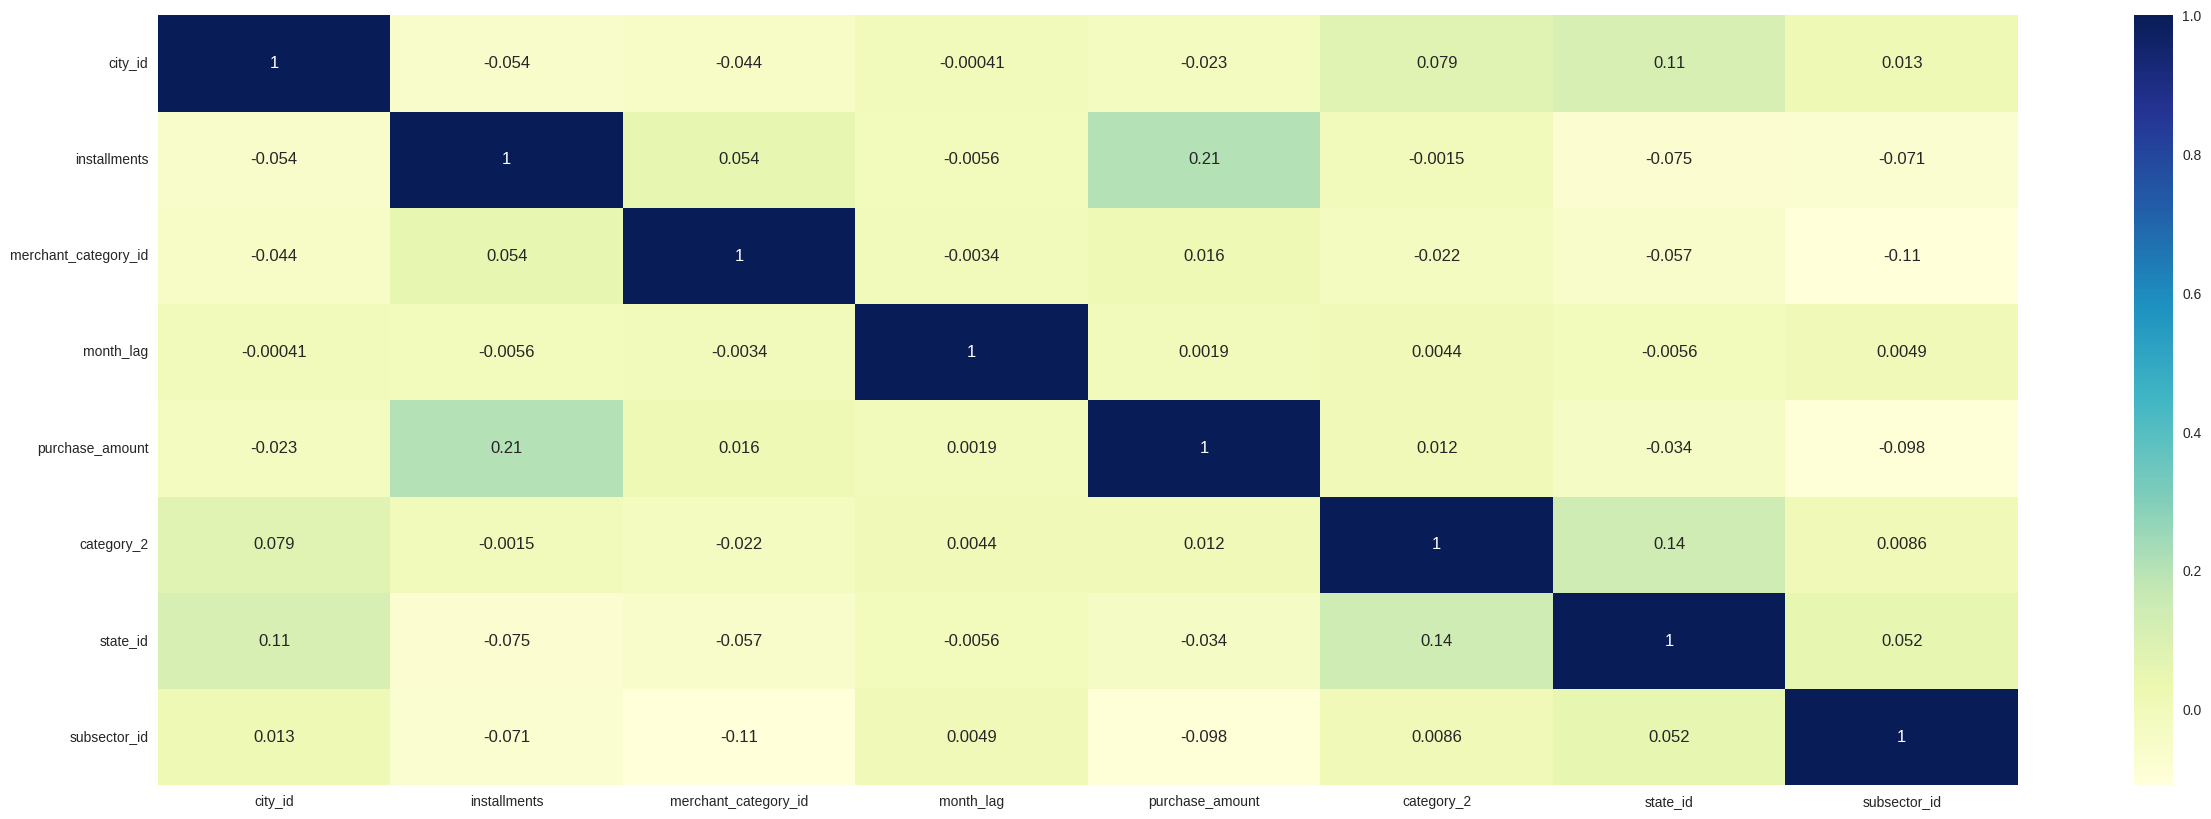

In [51]:
num_cols = df_new_merchant_trans.select_dtypes('number').columns.tolist()
plt.figure(figsize = (30,10))
sns.heatmap(df_new_merchant_trans[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

<Figure size 3000x1000 with 0 Axes>

<Axes: >

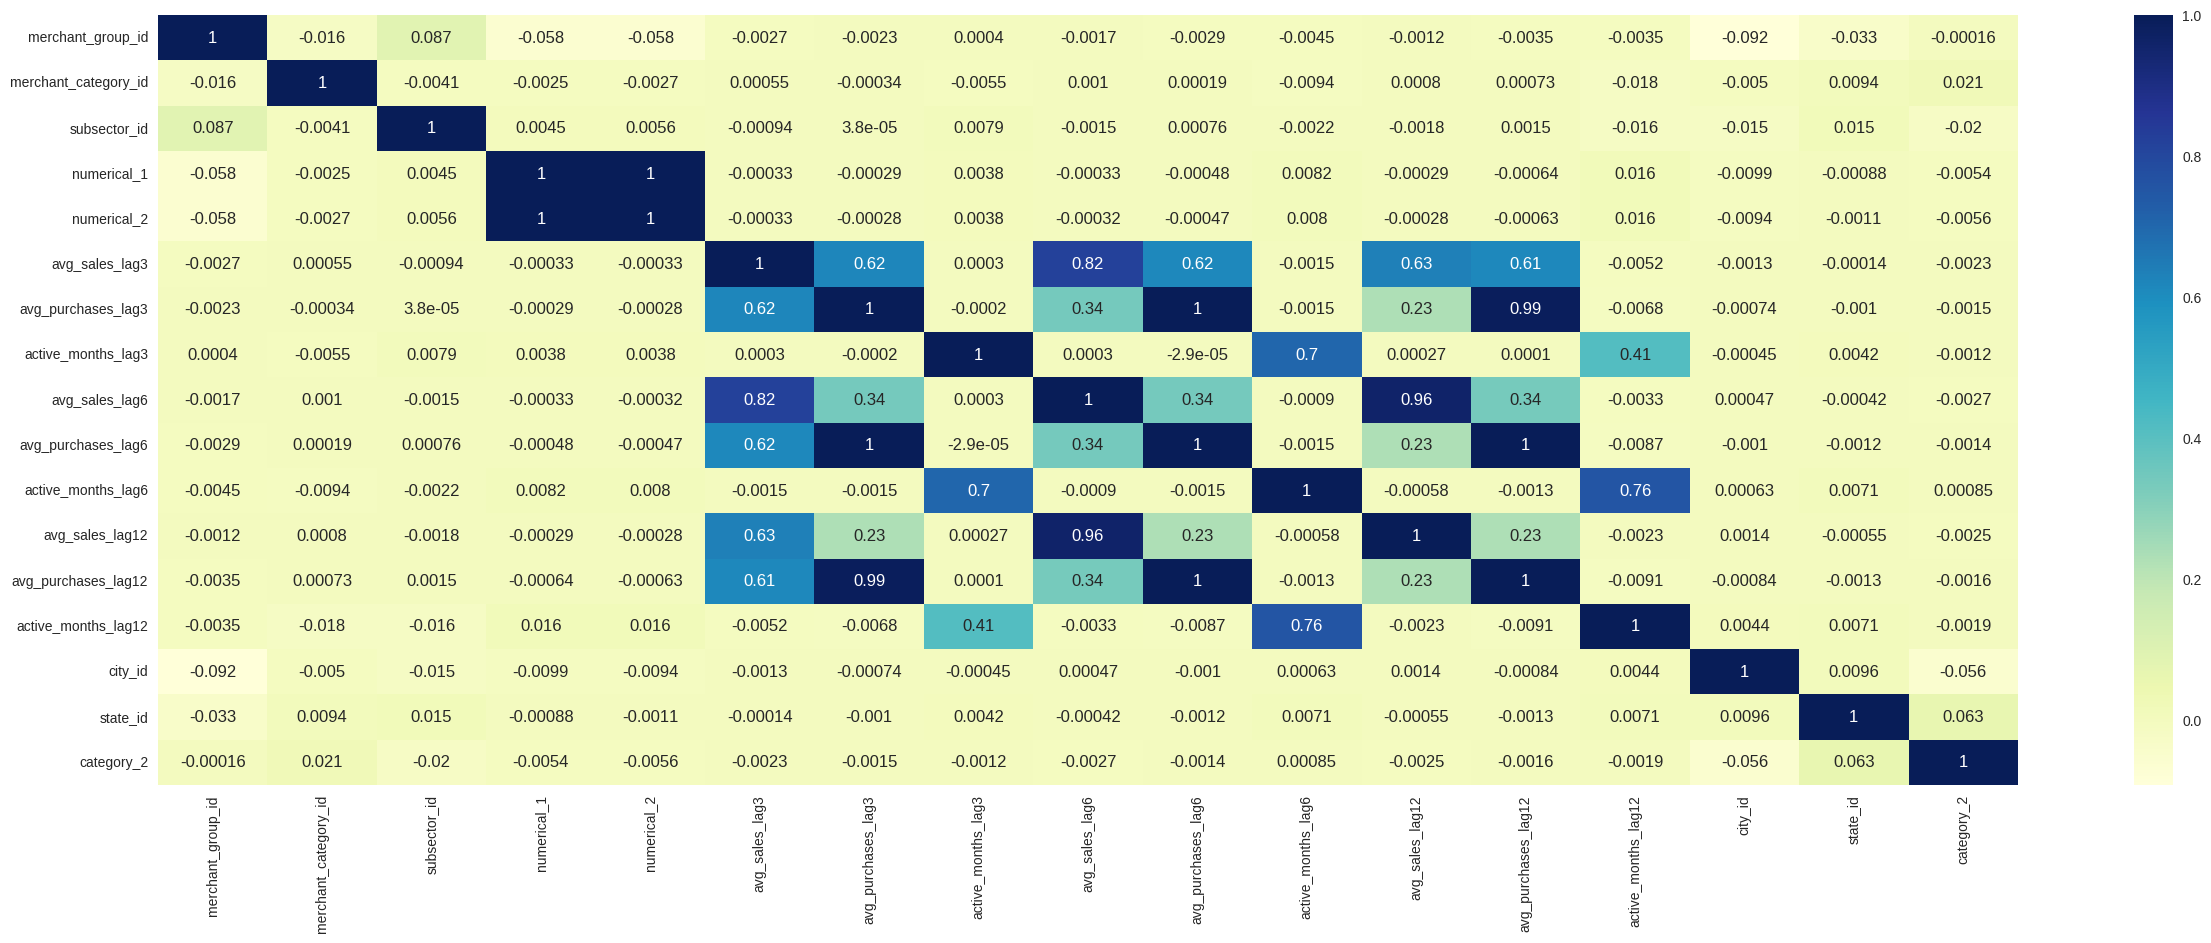

In [52]:
num_cols = df_merchant.select_dtypes('number').columns.tolist()
plt.figure(figsize = (30,10))
sns.heatmap(df_merchant[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

<Figure size 3000x1000 with 0 Axes>

<Axes: >

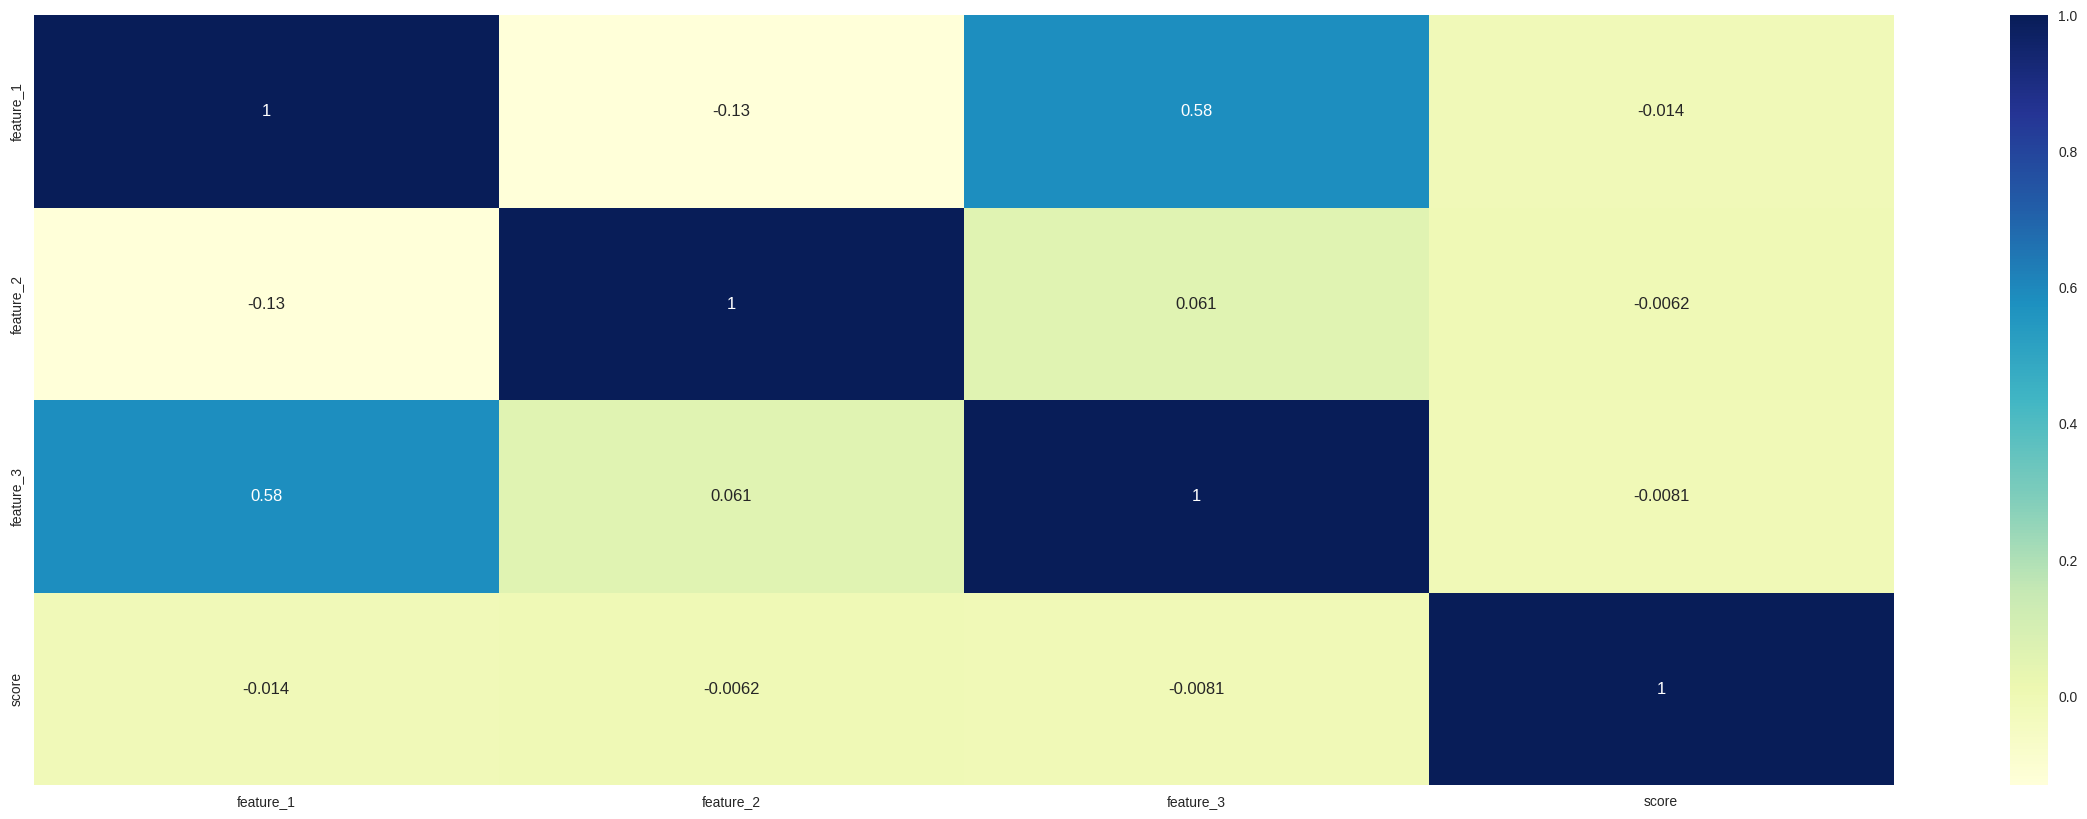

In [54]:
num_cols = df_userscore.select_dtypes('number').columns.tolist()
plt.figure(figsize = (30,10))
sns.heatmap(df_userscore[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

<Figure size 3000x1000 with 0 Axes>

<Axes: >

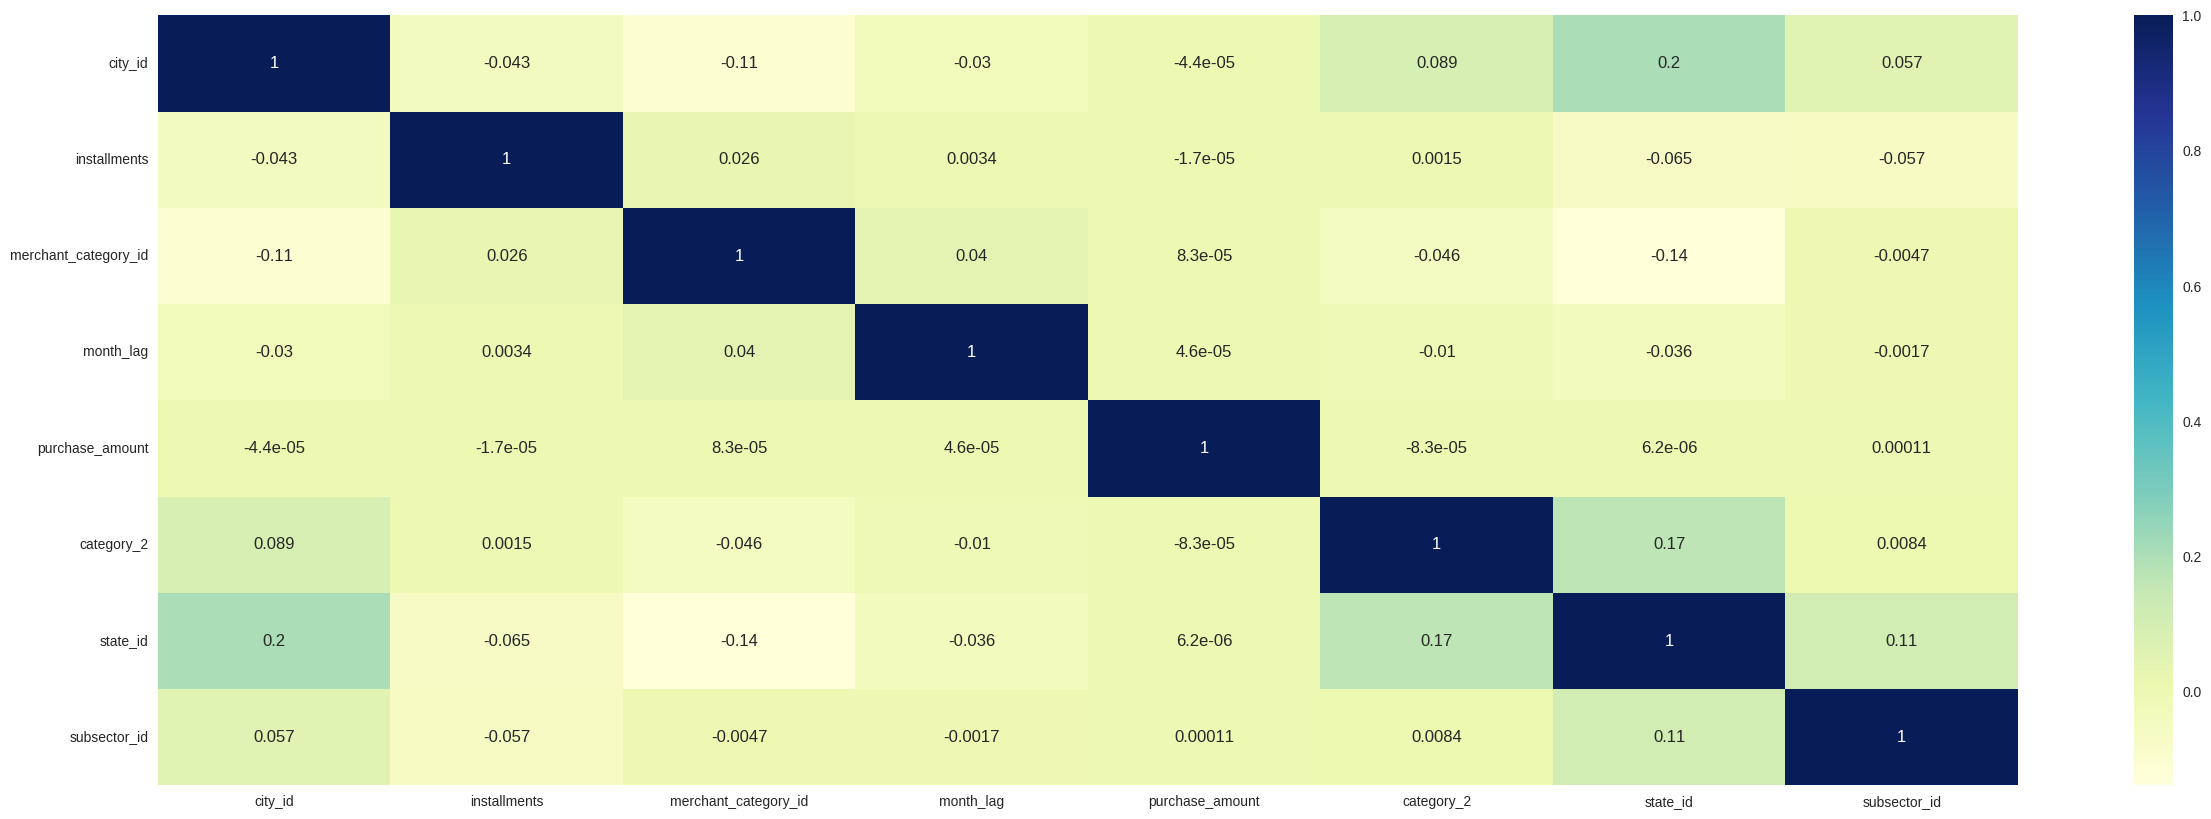

In [53]:
num_cols = df_hist_trans.select_dtypes('number').columns.tolist()

plt.figure(figsize = (30,10))
sns.heatmap(df_hist_trans[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

> **From the corrolation matrix we find the same result as VIF test so we will drop some columns that will not give us meaningfull value**

In [55]:
df_merchant.describe()  #avg_purchases_lag3 ,avg_purchases_lag6,avg_purchases_lag12

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000,334696.000,334696.000,334696.000,334696.000,334683.000,334696.000,334696.000,334683.000,334696.000,334696.000,334683.000,334696.000,334696.000,334696.000,334696.000,322809.000
mean,31028.736,423.132,25.116,0.011,0.008,13.833,inf,2.994,21.651,inf,5.947,25.228,inf,11.599,102.918,11.861,2.380
std,31623.043,252.898,9.807,1.098,1.070,2395.490,NaN,0.095,3947.108,NaN,0.395,5251.842,NaN,1.520,107.091,6.177,1.563
min,1.000,-1.000,-1.000,-0.057,-0.057,-82.130,0.333,1.000,-82.130,0.167,1.000,-82.130,0.098,1.000,-1.000,-1.000,1.000
25%,3612.000,222.000,19.000,-0.057,-0.057,0.880,0.924,3.000,0.850,0.902,6.000,0.850,0.898,12.000,-1.000,9.000,1.000
50%,19900.000,373.000,27.000,-0.057,-0.057,1.000,1.017,3.000,1.010,1.027,6.000,1.020,1.043,12.000,69.000,9.000,2.000
75%,51707.250,683.000,33.000,-0.048,-0.048,1.160,1.147,3.000,1.230,1.216,6.000,1.290,1.266,12.000,182.000,16.000,4.000
max,112586.000,891.000,41.000,183.735,182.079,851844.640,inf,3.000,1513959.000,inf,6.000,2567408.000,inf,12.000,347.000,24.000,5.000


## Clean Data

### Deal with Inf Data

In [10]:
df_merchant = df_merchant.replace([np.inf, -np.inf], np.nan)

### Deal with Outliers 

> **These is our first trile with outliers when we use it it did not handle the outliers perfectly so we will try another way**

In [51]:
def iqr(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    S = 1.5*IQR
    x[x < Q1 - S] = Q1 - S
    x[x > Q3 + S] = Q3 + S
    return x


In [52]:
num_cols = df_hist_trans.select_dtypes('number').columns.tolist()
df_hist_trans[num_cols] = df_hist_trans[num_cols].apply(iqr)

In [53]:
num_cols = df_new_merchant_trans.select_dtypes('number').columns.tolist()
df_new_merchant_trans[num_cols] = df_new_merchant_trans[num_cols].apply(iqr)

In [54]:
num_cols = df_merchant.select_dtypes('number').columns.tolist()
df_merchant[num_cols] = df_merchant[num_cols].apply(iqr)

### Deal with Null values

|Column|Null percentage|Missing value patterns|Missing value mechanism|Data Type|Solution|
| --- | --- | --- |--- |--- |---|
|merchant_id|0.48%| |MCAR|Object|Drop Null Values |
|category_3|0.61%| |MCAR|Object|Most Frequent |
|category_2|9.11%||MCAR|Object|Most Frequent |

In [11]:
df_new_merchant_trans['merchant_id'] = df_new_merchant_trans['merchant_id'].dropna()

mar_cols = ['category_3', 'category_2','state_id','city_id','installments']

imputer = SimpleImputer(strategy='most_frequent')
df_new_merchant_trans[mar_cols] = imputer.fit_transform(df_new_merchant_trans[mar_cols])


|Column|Null percentage|Missing value patterns|Missing value mechanism|Data Type|Solution|
| --- | --- | --- |--- |--- |---|
|merchant_id|1.34%| |MCAR|Object|Drop Null Values |
|category_3|2.85%| |MCAR|Object|Most Frequent |
|category_2|5.69%||MCAR|Object|Most Frequent |

In [12]:
df_hist_trans['merchant_id'] = df_hist_trans['merchant_id'].dropna()



mar_cols = [ 'category_3', 'category_2','state_id','city_id','installments']

imputer = SimpleImputer(strategy='most_frequent')
df_hist_trans[mar_cols] = imputer.fit_transform(df_hist_trans[mar_cols])


|Column|Null percentage|Missing value patterns|Missing value mechanism|Data Type|Solution|
| --- | --- | --- |--- |--- |---|
|avg_sales_lag12 |0.00%| |MCAR|Object|Mean |
|avg_sales_lag6 |0.00%| |MCAR|Object|Mean|
|avg_sales_lag3 |0.00%| |MCAR|Object|Mean|
|category_2|0.61%||MCAR|Object|Most Frequent |

In [13]:

mar_cols = ['avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12']

imputer = SimpleImputer(strategy='mean')
df_merchant[mar_cols] = imputer.fit_transform(df_merchant[mar_cols])




mar_cols = ['category_2']

imputer = SimpleImputer(strategy='most_frequent')
df_merchant[mar_cols] = imputer.fit_transform(df_merchant[mar_cols])

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


### Duplicated Marchent id's

In [14]:
print("Number of duplicate merchant_ids: %d" % 
      df_merchant['merchant_id'].duplicated().sum())

Number of duplicate merchant_ids: 63


In [15]:
# Show some of the duplicates
duplicates = df_merchant['merchant_id'].duplicated(keep=False)
df_merchant[duplicates].sort_values('merchant_id').head(6)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
111,M_ID_0039220eb3,35,836,5,-0.057,-0.057,Y,E,E,0.660,...,0.660,0.667,3,0.660,0.667,3,Y,-1,-1,1.000
112,M_ID_0039220eb3,35,836,5,0.409,0.409,Y,C,D,1.170,...,1.170,1.088,6,1.190,0.997,12,Y,-1,-1,1.000
110970,M_ID_00a6ca8a8a,35,511,7,-0.057,-0.057,Y,A,A,0.930,...,0.860,0.871,6,0.760,0.753,12,Y,-1,-1,1.000
110969,M_ID_00a6ca8a8a,35,511,7,-0.048,-0.057,Y,E,E,6.930,...,8.420,15.856,6,8.570,16.220,7,Y,-1,-1,1.000
70494,M_ID_07a5671b4c,35,180,20,0.032,0.032,N,E,E,1.260,...,1.200,1.253,6,1.150,1.263,12,N,188,9,1.000
70493,M_ID_07a5671b4c,35,180,20,-0.057,-0.057,N,E,E,1.000,...,1.000,1.000,1,1.000,1.000,1,N,188,9,1.000


In [16]:
# Drop duplicate entries
df_merchant.drop_duplicates(subset='merchant_id',
                          keep='first', inplace=True)

### Change Data types

In [15]:
df_userscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [16]:
df_new_merchant_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               object 
 3   category_1            object 
 4   installments          object 
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            object 
 12  state_id              object 
 13  subsector_id          int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 209.7+ MB


In [17]:
df_hist_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               object 
 3   category_1            object 
 4   installments          object 
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            object 
 12  state_id              object 
 13  subsector_id          int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.0+ GB


In [18]:
df_merchant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334633 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334633 non-null  object 
 1   merchant_group_id            334633 non-null  int64  
 2   merchant_category_id         334633 non-null  int64  
 3   subsector_id                 334633 non-null  int64  
 4   numerical_1                  334633 non-null  float64
 5   numerical_2                  334633 non-null  float64
 6   category_1                   334633 non-null  object 
 7   most_recent_sales_range      334633 non-null  object 
 8   most_recent_purchases_range  334633 non-null  object 
 9   avg_sales_lag3               334633 non-null  float64
 10  avg_purchases_lag3           334630 non-null  float64
 11  active_months_lag3           334633 non-null  int64  
 12  avg_sales_lag6               334633 non-null  float64
 13  avg_

In [17]:
df_hist_trans[['state_id','city_id','installments','merchant_category_id','subsector_id']] = df_hist_trans[['state_id','city_id','installments','merchant_category_id','subsector_id']].astype('object')
df_new_merchant_trans[['state_id','city_id','installments','merchant_category_id','subsector_id']] = df_new_merchant_trans[['state_id','city_id','installments','merchant_category_id','subsector_id']].astype('object')
df_merchant[['state_id','city_id','merchant_group_id','merchant_category_id','subsector_id','category_2','category_1']] = df_merchant[['state_id','city_id','merchant_group_id','merchant_category_id','subsector_id','category_2','category_1']].astype('object')


In [18]:
# Convert "first_active_month" column to datetime format
df_userscore['first_active_month'] = pd.to_datetime(df_userscore['first_active_month'], format='%b-%y')
df_userscore['first_active_month'].unique

<bound method Series.unique of 0        2017-06-01
1        2017-01-01
2        2016-08-01
3        2017-09-01
4        2017-11-01
            ...    
201912   2017-09-01
201913   2015-10-01
201914   2017-08-01
201915   2016-07-01
201916   2017-07-01
Name: first_active_month, Length: 201917, dtype: datetime64[ns]>

In [19]:
df_new_merchant_trans['purchase_date'] = pd.to_datetime(df_new_merchant_trans['purchase_date'], format='%Y-%m-%d %H:%M:%S')
df_hist_trans['purchase_date'] = pd.to_datetime(df_hist_trans['purchase_date'], format='%Y-%m-%d %H:%M:%S')

### Drop Columns with high VIF values 

From above we will need to drope data that have high VIF value, We will take threshold higher than 10 : 
* numerical_1 
* avg_sales_lag3 
* avg_purchases_lag3 
* active_months_lag3 

In [20]:
df_merchant = df_merchant.drop('numerical_1', axis=1)
df_merchant = df_merchant.drop('avg_sales_lag6', axis=1)
df_merchant = df_merchant.drop('avg_purchases_lag6', axis=1)
df_merchant = df_merchant.drop('active_months_lag6', axis=1)
df_merchant = df_merchant.drop('avg_sales_lag12', axis=1)
df_merchant = df_merchant.drop('avg_purchases_lag12', axis=1)


### Solve Outliers

> **These is the second method to deal with outliers and we think it is more suitable with our data** 

Hmm, values of -1 and -25? Those are probably to indicate missing values, so we'll set the installments with negative numbers to NaN:

In [21]:
# Set negative installments to nan
df_hist_trans.loc[df_hist_trans['installments']<0, 'installments'] = np.nan
df_new_merchant_trans.loc[df_new_merchant_trans['installments']<0, 'installments'] = np.nan

In [22]:
# Set negative ids to nan
df_hist_trans.loc[df_hist_trans['city_id']<0, 'city_id'] = np.nan
df_new_merchant_trans.loc[df_new_merchant_trans['city_id']<0, 'city_id'] = np.nan
df_hist_trans.loc[df_hist_trans['state_id']<0, 'state_id'] = np.nan
df_new_merchant_trans.loc[df_new_merchant_trans['state_id']<0, 'state_id'] = np.nan

In [23]:
df_hist_trans['installments']=df_hist_trans['installments'].replace(999, 11)
df_new_merchant_trans['installments']=df_new_merchant_trans['installments'].replace(999, 11)


In [24]:
# df_new_merchant_trans['installments']=df_new_merchant_trans['installments'].replace(999, 11)
# df_new_merchant_trans['state_id']=df_new_merchant_trans['state_id'].replace(-1, 0)

In [25]:
def iqr(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    S = 1.5*IQR
    x[x < Q1 - S] = Q1 - S
    x[x > Q3 + S] = Q3 + S
    return x


In [26]:
cols = ['active_months_lag3','avg_purchases_lag3','avg_sales_lag3','numerical_2']
df_merchant[cols] = df_merchant[cols].apply(iqr)

# Feature Engineering

Then, we can create some time-based features about the purchases. For example: the hour of the day the purchase was made, the day of the week, the week of the year, the month, whether the purchase was made on a weekend, the time of the purchase relative to when the card owner was first active, etc.

In [27]:
# Time-based features for purchases
ref_date = np.datetime64('2017-09-01')
one_hour = np.timedelta64(1, 'h')
for df in [df_hist_trans, df_new_merchant_trans]:
    tpd = df['purchase_date']
    df['purchase_hour'] = tpd.dt.hour.astype('uint8')
    df['purchase_day'] = tpd.dt.dayofweek.astype('uint8')
    df['purchase_week'] = tpd.dt.isocalendar().week.astype('uint8')
    df['purchase_dayofyear'] = tpd.dt.dayofyear.astype('uint16')
    df['purchase_month'] = tpd.dt.month.astype('uint8')
    df['purchase_weekend'] = (df['purchase_day'] >=5 ).astype('uint8')
    df['purchase_time'] = ((tpd - ref_date) / one_hour).astype('float32')
    df['ref_date'] = ((tpd - pd.to_timedelta(df['month_lag']*30,  unit = 'D')
                          - ref_date ) / one_hour).astype('float32')

#     # Time sime first active
#     tsfa = pd.merge(df[['card_id']], 
#                     cards[['first_active_month']].copy().reset_index(),
#                     on='card_id', how='left')
#     df['time_since_first_active'] = ((tpd - tsfa['first_active_month'])
#                                      / one_hour).astype('float32')
    
    # Clean up
#     del tsfa
#     del df['purchase_date']
    gc.collect()

13

0

**Mismatch between Merchants and Transactions Data**</br>
Both the transactions data (historical_transactions.csv and new_merchant_transactions.csv) and the merchants data (merchants.csv) have the following columns:

city_id
state_id
category_1
category_2
subsector_id
merchant_category_id, and
merchant_id
Obviously we want them both to have merchant_id so that we can connect the tables, but it's unclear whether the other columns in the transactions table represent information about the merchant or the transaction. It seems that merchant_category_id and subsector_id at least should definitely represent information about the merchant, and therefore should be the same between transactions involving the same merchant_id, and should also match the information in merchants.csv. If city_id and state_id represent, say, the corporate mailing address of the merchant, then those should also remain constant. On the other hand, if they represent the city and state where the transaction occurred, there may be many different values for the same merchant_id. Since category_1 and category_2 are in both datasets, it seems likely that they also represent information about the merchant.



## Save Data 

> **Save the data after cleaning**

In [28]:
df_new_merchant_trans.to_csv('df_new_merchant_trans.csv')
df_hist_trans.to_csv('df_hist_trans.csv')
df_merchant.to_csv('df_merchant.csv')
df_userscore.to_csv('df_userscore.csv')

## Exploratory Data Analysis (EDA)

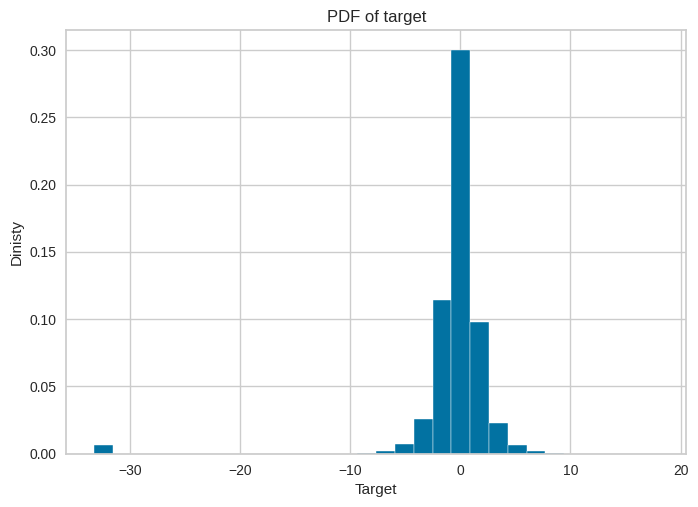

In [74]:
# generate a histogram of the 'age' column
fig = plt.hist(df_userscore['score'],density=True, bins=30)
x = plt.xlabel('Target')
x = plt.ylabel('Dinisty')
x = plt.title('PDF of target')
plt.show()

> **From above we can say that the distrbution of the target column without the outliers is normal**

> **first_active_month Vs. score**

In [75]:
# Convert "first_active_month" column to datetime format
df_userscore['first_active_month'] = pd.to_datetime(df_userscore['first_active_month'], format='%b-%y')
df_userscore['first_active_month'].unique

<bound method Series.unique of 0        2017-06-01
1        2017-01-01
2        2016-08-01
3        2017-09-01
4        2017-11-01
            ...    
201912   2017-09-01
201913   2015-10-01
201914   2017-08-01
201915   2016-07-01
201916   2017-07-01
Name: first_active_month, Length: 201917, dtype: datetime64[ns]>

<Figure size 2000x1000 with 0 Axes>

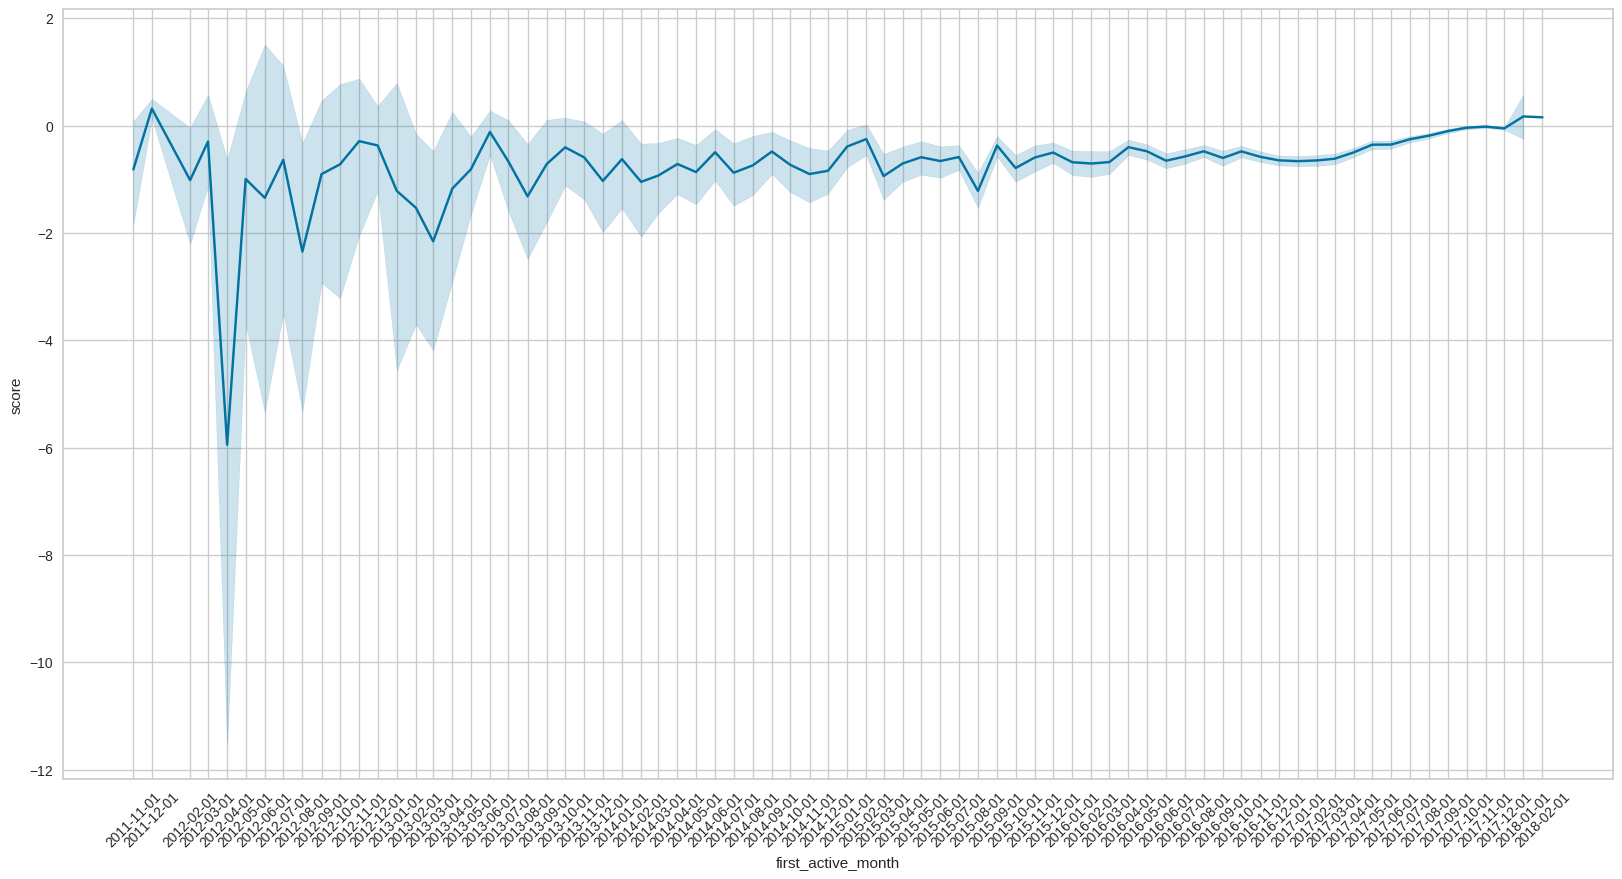

In [76]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(data=df_userscore, x="first_active_month", y='score')
x = plt.xticks(list(set(df_userscore.first_active_month)), rotation=45)
plt.show()

> **Here we will view the relation between number of active days & loyalty score**

In [77]:
# Convert "first_active_month" column to datetime format
df_userscore['first_active_month'] = pd.to_datetime(df_userscore['first_active_month'], format='%b-%y')
df_userscore['first_active_month'].unique

<bound method Series.unique of 0        2017-06-01
1        2017-01-01
2        2016-08-01
3        2017-09-01
4        2017-11-01
            ...    
201912   2017-09-01
201913   2015-10-01
201914   2017-08-01
201915   2016-07-01
201916   2017-07-01
Name: first_active_month, Length: 201917, dtype: datetime64[ns]>

In [78]:
df_userscore['first_active_month'] = pd.to_datetime(df_userscore['first_active_month'], format='%Y-%M')
today = pd.to_datetime('today')
df_userscore['first_active_month_diff_from_today'] = (12 * (today.year - df_userscore['first_active_month'].dt.year) + (today.month - df_userscore['first_active_month'].dt.month)) 


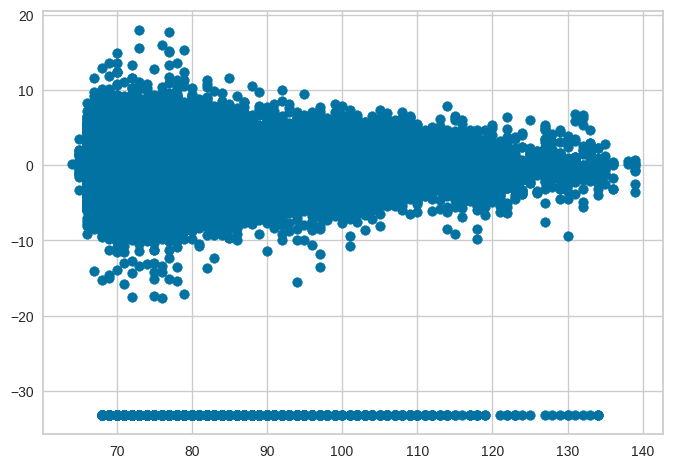

In [79]:
plt.scatter(df_userscore['first_active_month_diff_from_today'], df_userscore['score'])

# Add labels and title
# plt.title("Intersection of Column1 and Column2")
# plt.xlabel("Column1")
# plt.ylabel("Column2")

# Display plot
plt.show()

> **Descover the category columns in both transaction table and merchant table** 

<Figure size 600x400 with 0 Axes>

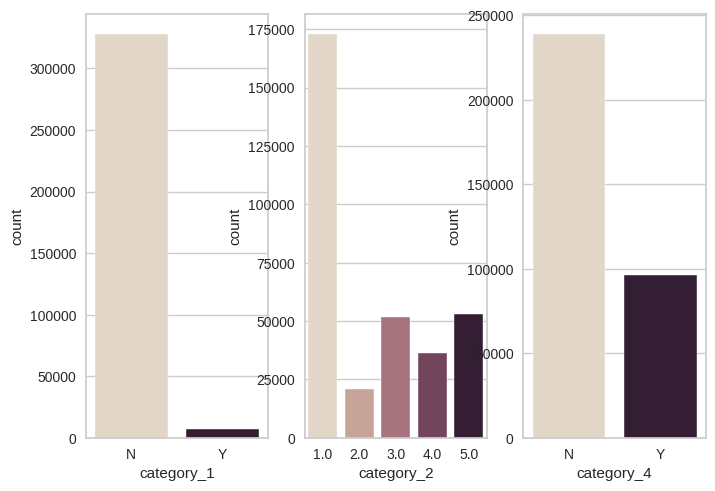

In [80]:
fig = plt.figure(figsize=(6, 4), dpi=100)
fig, axes = plt.subplots(1,3)
x=sns.countplot(data=df_merchant, x="category_1" , palette="ch:.25", ax=axes[0])
x=sns.countplot(data=df_merchant, x="category_2" , palette="ch:.25", ax=axes[1])
x=sns.countplot(data=df_merchant, x="category_4" , palette="ch:.25", ax=axes[2])
# Show the figure
plt.show()

<Figure size 600x400 with 0 Axes>

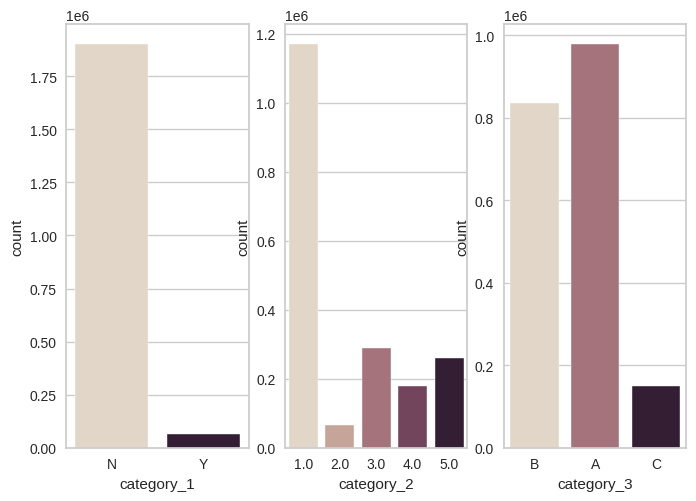

In [81]:
fig = plt.figure(figsize=(6, 4), dpi=100)
fig, axes = plt.subplots(1,3)
x=sns.countplot(data=df_new_merchant_trans, x="category_1" , palette="ch:.25", ax=axes[0])
x=sns.countplot(data=df_new_merchant_trans, x="category_2" , palette="ch:.25", ax=axes[1])
x=sns.countplot(data=df_new_merchant_trans, x="category_3" , palette="ch:.25", ax=axes[2])
# Show the figure
plt.show()

> **We can say that the distribution of catergories in both new data & transaction data is the same** 

<BarContainer object of 7 artists>

Text(0.5, 0, 'Day of the week')

Text(0, 0.5, 'Number of purchases')

Text(0.5, 1.0, 'Number of purchases by day of the week')

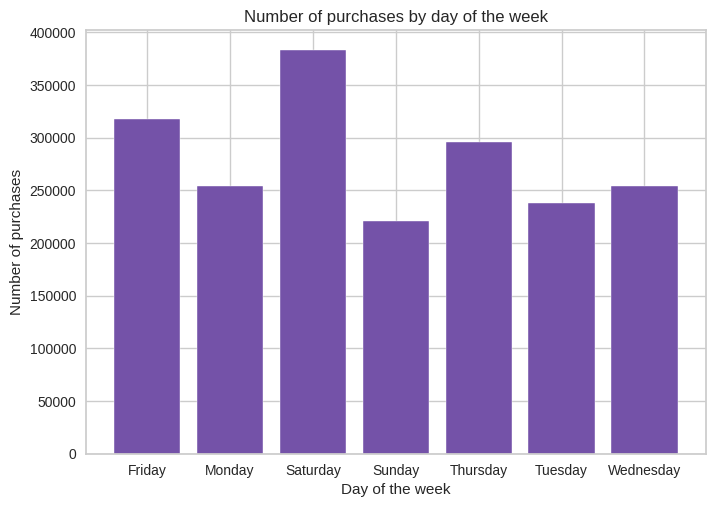

In [89]:
# Extract the day of the week from the datetime object
df_new_merchant_trans['day_of_week'] = df_new_merchant_trans['purchase_date'].dt.day_name()

# Group the data by day of the week and count the number of purchases
purchases_by_day = df_new_merchant_trans.groupby('day_of_week')['purchase_amount'].count()

# Create a bar plot of the number of purchases by day of the week
plt.bar(purchases_by_day.index, purchases_by_day.values,color = '#7452A8')
plt.xlabel('Day of the week')
plt.ylabel('Number of purchases')
plt.title('Number of purchases by day of the week')
plt.show()

> **The peack of Purchase amount is in Friday & saturday**

<BarContainer object of 24 artists>

Text(0.5, 0, 'Hours of the day')

Text(0, 0.5, 'Number of purchases')

Text(0.5, 1.0, 'Number of purchases by hour')

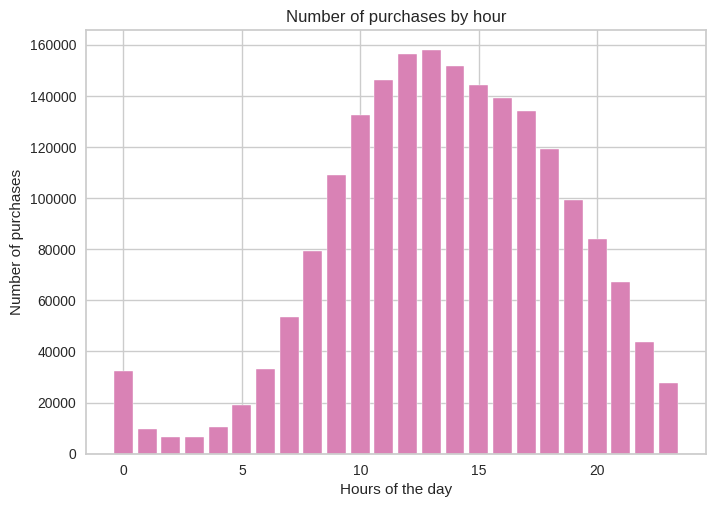

In [83]:
# Convert the date column to a datetime object
# df['date'] = pd.to_datetime(df['date'])

# Extract the hour from the datetime object
df_new_merchant_trans['hour'] = df_new_merchant_trans['purchase_date'].dt.hour

# Group the data by hour and count the number of purchases
purchases_by_hour = df_new_merchant_trans.groupby('hour')['purchase_date'].count()

# Plot the number of purchases against the hours of the day
plt.bar(purchases_by_hour.index, purchases_by_hour.values,color = '#D982B5')
plt.xlabel('Hours of the day')
plt.ylabel('Number of purchases')
plt.title('Number of purchases by hour')
plt.show()

# Pre-Processing

In [114]:
def reduce_memory_usage(df, verbose=True):
  '''
  This function reduces the memory sizes of dataframe by changing the datatypes of the columns.
  Parameters
  df - DataFrame whose size to be reduced
  verbose - Boolean, to mention the verbose required or not.
  '''
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
      col_type = df[col].dtypes
      if col_type in numerics:
          c_min = df[col].min()
          c_max = df[col].max()
          if str(col_type)[:3] == 'int':
              if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                  df[col] = df[col].astype(np.int8)
              elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                  df[col] = df[col].astype(np.int16)
              elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                  df[col] = df[col].astype(np.int32)
              elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                  df[col] = df[col].astype(np.int64)
          else:
              c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
              if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                  df[col] = df[col].astype(np.float16)
              elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                  df[col] = df[col].astype(np.float32)
              else:
                  df[col] = df[col].astype(np.float64)
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
  return df

In [4]:
df_hist_trans = reduce_memory_usage(pd.read_csv('df_hist_trans.csv'))
df_new_merchant_trans = reduce_memory_usage(pd.read_csv('df_new_merchant_trans.csv'))

Mem. usage decreased to 3303.88 Mb (35.3% reduction)
Mem. usage decreased to 222.78 Mb (35.3% reduction)


In [5]:
df_userscore = reduce_memory_usage( pd.read_csv('df_userscore.csv'))

Mem. usage decreased to  5.97 Mb (44.6% reduction)


## Change Data Types

In [6]:
df_hist_trans[['state_id','city_id','installments','merchant_category_id','subsector_id']] = df_hist_trans[['state_id','city_id','installments','merchant_category_id','subsector_id']].astype('object')
df_new_merchant_trans[['state_id','city_id','installments','merchant_category_id','subsector_id']] = df_new_merchant_trans[['state_id','city_id','installments','merchant_category_id','subsector_id']].astype('object')

## Join Data

In [7]:
df = pd.concat([df_new_merchant_trans, df_hist_trans])

In [8]:
# del result
del df_hist_trans
del df_new_merchant_trans

In [14]:
df[df['card_id'] == 'C_ID_415bb3a509']

,Unnamed: 0,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,...,state_id,subsector_id,purchase_hour,purchase_day,purchase_week,purchase_dayofyear,purchase_month,purchase_weekend,purchase_time,ref_date
0,0,Y,C_ID_415bb3a509,107.0,N,1.0,B,307,M_ID_b0c793002c,1,...,9.0,19,14,6,10,70,3,1,4598.9600,3878.9600
1,1,Y,C_ID_415bb3a509,140.0,N,1.0,B,307,M_ID_88920c89e8,1,...,9.0,19,18,0,12,78,3,0,4794.8936,4074.8936
2,2,Y,C_ID_415bb3a509,330.0,N,1.0,B,507,M_ID_ad5237ef6b,2,...,9.0,14,14,3,17,116,4,0,5702.1455,4262.1455
3,3,Y,C_ID_415bb3a509,NaN,Y,1.0,B,661,M_ID_9e84cda3b1,1,...,NaN,8,9,2,10,66,3,0,4497.7227,3777.7224
27946623,27946623,Y,C_ID_415bb3a509,NaN,Y,1.0,B,755,M_ID_57df19bf28,0,...,NaN,8,13,3,8,53,2,0,4189.5120,4189.5120
27946624,27946624,Y,C_ID_415bb3a509,NaN,Y,5.0,C,690,M_ID_c9855bf3e3,-2,...,NaN,1,21,0,49,338,12,0,2277.1367,3717.1367
27946625,27946625,N,C_ID_415bb3a509,NaN,Y,1.0,B,755,M_ID_57df19bf28,0,...,NaN,8,13,3,8,53,2,0,4189.4995,4189.4995
27946626,27946626,Y,C_ID_415bb3a509,19.0,N,1.0,B,307,M_ID_094b8b5ebc,-1,...,9.0,19,10,5,3,20,1,1,3394.8650,4114.8650
27946627,27946627,Y,C_ID_415bb3a509,NaN,Y,3.0,C,690,M_ID_c9855bf3e3,-1,...,NaN,1,22,2,3,17,1,0,3334.3167,4054.3167


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31075392 entries, 0 to 29112360
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int32  
 1   authorized_flag       object 
 2   card_id               object 
 3   city_id               object 
 4   category_1            object 
 5   installments          object 
 6   category_3            object 
 7   merchant_category_id  object 
 8   merchant_id           object 
 9   month_lag             int8   
 10  purchase_amount       float64
 11  purchase_date         object 
 12  category_2            float64
 13  state_id              object 
 14  subsector_id          object 
 15  purchase_hour         int8   
 16  purchase_day          int8   
 17  purchase_week         int8   
 18  purchase_dayofyear    int16  
 19  purchase_month        int8   
 20  purchase_weekend      int8   
 21  purchase_time         float64
 22  ref_date              float64
dtypes: float64

## Check Null

In [16]:
df.isnull().sum()

Unnamed: 0                    0
authorized_flag               0
card_id                       0
city_id                 2577973
category_1                    0
installments             234081
category_3                    0
merchant_category_id          0
merchant_id              164697
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2                    0
state_id                2764609
subsector_id                  0
purchase_hour                 0
purchase_day                  0
purchase_week                 0
purchase_dayofyear            0
purchase_month                0
purchase_weekend              0
purchase_time                 0
ref_date                      0
dtype: int64

### Drop Null Values

In [9]:
df = df.dropna(axis=0, how='any')

In [18]:
df.isnull().sum()

Unnamed: 0              0
authorized_flag         0
card_id                 0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
purchase_hour           0
purchase_day            0
purchase_week           0
purchase_dayofyear      0
purchase_month          0
purchase_weekend        0
purchase_time           0
ref_date                0
dtype: int64

## Feature Selection

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27945843 entries, 0 to 29112360
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int32  
 1   authorized_flag       object 
 2   card_id               object 
 3   city_id               object 
 4   category_1            object 
 5   installments          object 
 6   category_3            object 
 7   merchant_category_id  object 
 8   merchant_id           object 
 9   month_lag             int8   
 10  purchase_amount       float64
 11  purchase_date         object 
 12  category_2            float64
 13  state_id              object 
 14  subsector_id          object 
 15  purchase_hour         int8   
 16  purchase_day          int8   
 17  purchase_week         int8   
 18  purchase_dayofyear    int16  
 19  purchase_month        int8   
 20  purchase_weekend      int8   
 21  purchase_time         float64
 22  ref_date              float64
dtypes: float64

In [10]:
df = df.drop(['Unnamed: 0','subsector_id','merchant_id' ], axis=1)

df = df.drop(['month_lag' ], axis=1)

In [21]:
df[df['card_id'] == 'C_ID_241a01e9d9']

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,purchase_amount,purchase_date,category_2,state_id,purchase_hour,purchase_day,purchase_week,purchase_dayofyear,purchase_month,purchase_weekend,purchase_time,ref_date
26,Y,C_ID_241a01e9d9,69.0,N,3.0,C,884,-0.461705,2018-04-22 19:19:08,1.0,9.0,19,6,16,112,4,1,5611.31900,4171.3190
27,Y,C_ID_241a01e9d9,188.0,N,6.0,C,690,-0.294760,2018-04-22 19:34:11,1.0,9.0,19,6,16,112,4,1,5611.57000,4171.5700
5919749,Y,C_ID_241a01e9d9,188.0,N,1.0,B,705,-0.626936,2018-01-03 09:26:29,1.0,9.0,9,2,1,3,1,0,2985.44140,3705.4414
5919751,Y,C_ID_241a01e9d9,116.0,N,1.0,B,80,-0.715352,2018-01-24 12:44:31,1.0,9.0,12,2,4,24,1,0,3492.74200,4212.7420
5919752,Y,C_ID_241a01e9d9,188.0,N,1.0,B,80,-0.688304,2017-11-07 19:48:06,1.0,9.0,19,1,45,311,11,0,1627.80160,3787.8018
5919754,Y,C_ID_241a01e9d9,188.0,N,1.0,B,80,-0.722865,2017-11-07 20:11:50,1.0,9.0,20,1,45,311,11,0,1628.19730,3788.1973
5919755,Y,C_ID_241a01e9d9,116.0,N,1.0,B,367,-0.653894,2018-01-27 09:41:58,1.0,9.0,9,5,4,27,1,1,3561.69950,4281.6990
5919757,Y,C_ID_241a01e9d9,188.0,N,1.0,B,705,-0.427429,2018-01-22 19:25:25,1.0,9.0,19,0,4,22,1,0,3451.42360,4171.4240
5919759,Y,C_ID_241a01e9d9,188.0,N,3.0,C,332,-0.431351,2017-11-20 16:17:07,1.0,9.0,16,0,47,324,11,0,1936.28530,4096.2850
5919760,Y,C_ID_241a01e9d9,188.0,N,1.0,B,834,-0.686817,2017-09-14 19:21:37,1.0,9.0,19,3,37,257,9,0,331.36030,3931.3604


In [11]:
df['installments']=df['installments'].replace(999, 11)

In [23]:
df['installments'].unique()

array([ 1.,  3.,  2.,  6.,  0., 10.,  5.,  8.,  4.,  9., 12.,  7., 11.])

In [12]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'],
                                         format='%Y-%m-%d %H:%M:%S')
df['purchase_year'] = df['purchase_date'].dt.year.astype('uint16')

In [13]:
df['installments'] = df['installments'].astype('uint8')

In [26]:
df.describe()

,installments,purchase_amount,purchase_date,category_2,purchase_hour,purchase_day,purchase_week,purchase_dayofyear,purchase_month,purchase_weekend,purchase_time,ref_date,purchase_year
count,2.794584e+07,2.794584e+07,27945843,2.794584e+07,2.794584e+07,2.794584e+07,2.794584e+07,2.794584e+07,2.794584e+07,2.794584e+07,2.794584e+07,2.794584e+07,2.794584e+07
mean,5.652413e-01,3.200915e-02,2017-09-14 17:31:48.116830464,2.193969e+00,1.416682e+01,3.041243e+00,2.576336e+01,1.780280e+02,6.355058e+00,2.845070e-01,3.295300e+02,3.340200e+03,2.017217e+03
min,0.000000e+00,-7.469078e-01,2017-01-01 00:00:08,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-5.831998e+03,-5.132586e+03,2.017000e+03
25%,0.000000e+00,-7.198601e-01,2017-06-12 20:03:28,1.000000e+00,1.100000e+01,1.000000e+00,9.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.923942e+03,3.576561e+03,2.017000e+03
50%,0.000000e+00,-6.879287e-01,2017-09-30 18:47:25,1.000000e+00,1.500000e+01,3.000000e+00,2.600000e+01,1.820000e+02,7.000000e+00,0.000000e+00,7.147903e+02,3.855114e+03,2.017000e+03
75%,1.000000e+00,-6.071612e-01,2017-12-22 12:31:10.500000,3.000000e+00,1.800000e+01,5.000000e+00,4.100000e+01,2.860000e+02,1.000000e+01,1.000000e+00,2.700520e+03,4.093488e+03,2.017000e+03
max,1.200000e+01,6.010604e+06,2018-04-30 23:59:59,5.000000e+00,2.300000e+01,6.000000e+00,5.200000e+01,3.650000e+02,1.200000e+01,1.000000e+00,5.807999e+03,4.391997e+03,2.018000e+03
std,9.768131e-01,1.146401e+03,NaN,1.531755e+00,5.328119e+00,1.916951e+00,1.662675e+01,1.166826e+02,3.822852e+00,4.511793e-01,2.918735e+03,1.491447e+03,4.119896e-01


In [14]:
df.sort_values(by='purchase_date', inplace=True)

## Group Data

> Columns that we will aggregate using **mod**

In [15]:
mod_col = ['authorized_flag','city_id','category_1',
'category_3','merchant_category_id',
'category_2' ]


> Columns that we will aggregate using **Max ,Median , and Sum**

In [16]:
max_col = ['ref_date','purchase_day','purchase_week', 'purchase_dayofyear','purchase_year' ,'purchase_month' , 'purchase_time']  # Max
Sum_col = ['purchase_amount']# Sum
last_col = ['installments'] 

In [37]:
grouped_df = df.groupby('card_id')[mod_col].agg(lambda x: x.mode()[0])
# grouped_df = df.groupby('card_id').agg({col: 'max' for col in mod_col})
grouped_df3 = df.groupby('card_id').agg({col: 'max' for col in max_col})
grouped_df4 = df.groupby('card_id').agg({col: 'last' for col in last_col})
grouped_df5 = df.groupby('card_id').agg({col: 'sum' for col in Sum_col})


grouped_df = pd.concat([grouped_df,grouped_df3,grouped_df4,grouped_df5 ], axis=1)

In [18]:
del grouped_df3,grouped_df4,grouped_df5

In [19]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320800 entries, C_ID_00007093c1 to C_ID_fffffd5772
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   authorized_flag       320800 non-null  object 
 1   city_id               320800 non-null  float64
 2   category_1            320800 non-null  object 
 3   category_3            320800 non-null  object 
 4   merchant_category_id  320800 non-null  int64  
 5   category_2            320800 non-null  float64
 6   ref_date              320800 non-null  float64
 7   purchase_day          320800 non-null  int8   
 8   purchase_week         320800 non-null  int8   
 9   purchase_dayofyear    320800 non-null  int16  
 10  purchase_year         320800 non-null  uint16 
 11  purchase_month        320800 non-null  int8   
 12  purchase_time         320800 non-null  float64
 13  installments          320800 non-null  uint8  
 14  purchase_amount       320800 non-n

In [41]:
# grouped_df = grouped_df.drop('card_id', axis=1).reset_index(level=0)

In [20]:
grouped_df.to_csv('grouped_df.csv')

In [39]:
## Here we will join (inner join) between all transaction data and user score data 
df_finall = pd.merge(grouped_df, df_userscore, on='card_id')

In [40]:
df_finall['first_active_month'] = pd.to_datetime(df_finall['first_active_month'],
                                         format='%Y-%m-%d')
df_finall['first_active_Month'] = df_finall['first_active_month'].dt.month.astype('uint8')
df_finall['first_active_Year'] = df_finall['first_active_month'].dt.year.astype('uint16')

In [23]:
df_finall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198974 entries, 0 to 198973
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   card_id               198974 non-null  object        
 1   authorized_flag       198974 non-null  object        
 2   city_id               198974 non-null  float64       
 3   category_1            198974 non-null  object        
 4   category_3            198974 non-null  object        
 5   merchant_category_id  198974 non-null  int64         
 6   category_2            198974 non-null  float64       
 7   ref_date              198974 non-null  float64       
 8   purchase_day          198974 non-null  int8          
 9   purchase_week         198974 non-null  int8          
 10  purchase_dayofyear    198974 non-null  int16         
 11  purchase_year         198974 non-null  uint16        
 12  purchase_month        198974 non-null  int8          
 13 

In [42]:
df_finall[['city_id','installments','merchant_category_id' ,'category_2' ]] = df_finall[['city_id','installments','merchant_category_id' ,'category_2' ]].astype('object')

In [43]:
df_finall = df_finall.drop(['score', 'Unnamed: 0','card_id'], axis=1)

In [44]:
df_finall = df_finall.drop(['first_active_month'], axis=1)

In [41]:
df_finall.head()

,authorized_flag,city_id,category_1,category_3,merchant_category_id,category_2,ref_date,purchase_day,purchase_week,purchase_dayofyear,purchase_year,purchase_month,purchase_time,installments,purchase_amount,feature_1,feature_2,feature_3,first_active_Month,first_active_Year
0,Y,244.0,N,B,307,3.0,4363.4610,6,52,364,2018,12,5296.4000,1,-58.134524,5,1,1,2,2017
1,Y,137.0,N,A,705,3.0,4356.9575,6,51,357,2018,12,4857.2417,0,-35.333881,2,2,0,7,2016
2,Y,161.0,N,B,367,3.0,4390.4214,6,52,363,2018,12,5701.7715,1,-76.605307,4,1,0,9,2017
3,Y,146.0,N,A,705,3.0,3615.1821,5,51,354,2018,12,3372.1243,0,-31.123047,3,1,1,5,2017
4,Y,69.0,N,A,178,1.0,3616.0520,6,52,364,2018,12,4904.7270,0,-48.113118,3,2,1,4,2017


In [27]:
df_finall.to_csv('df_finall.csv')

In [43]:
df_finall.describe()

,ref_date,purchase_day,purchase_week,purchase_dayofyear,purchase_year,purchase_month,purchase_time,purchase_amount,feature_1,feature_2,feature_3,first_active_Month,first_active_Year
count,198974.000000,198974.000000,198974.000000,198974.000000,198974.000000,198974.000000,198974.000000,1.989740e+05,198974.000000,198974.000000,198974.000000,198974.000000,198974.000000
mean,3492.458095,5.790229,48.178641,335.015258,2017.829254,11.282238,4314.360225,1.390530e+01,3.106717,1.744630,0.569336,7.379562,2016.510750
std,1718.334621,0.607232,7.703116,55.116418,0.376288,1.732879,1925.824673,1.354567e+04,1.182289,0.753016,0.495170,3.339601,0.787781
min,-4997.007300,0.000000,1.000000,1.000000,2017.000000,1.000000,-5825.440400,-2.073004e+03,1.000000,1.000000,0.000000,1.000000,2011.000000
25%,3594.798950,6.000000,49.000000,339.000000,2018.000000,12.000000,3886.196250,-6.520478e+01,2.000000,1.000000,0.000000,5.000000,2016.000000
50%,4315.108700,6.000000,51.000000,357.000000,2018.000000,12.000000,5075.335400,-3.025771e+01,3.000000,2.000000,1.000000,8.000000,2017.000000
75%,4357.550225,6.000000,52.000000,363.000000,2018.000000,12.000000,5606.806250,-1.252495e+01,4.000000,2.000000,1.000000,10.000000,2017.000000
max,4391.996600,6.000000,52.000000,365.000000,2018.000000,12.000000,5807.999500,6.010591e+06,5.000000,3.000000,1.000000,12.000000,2018.000000


## Encode Data

In [28]:
from category_encoders.binary import BinaryEncoder

encoder = BinaryEncoder()
encoder.fit(df_finall)
df_finall = encoder.transform(df_finall)

## Scalling

In [29]:
from sklearn.preprocessing import Normalizer
def scale_data(data, norm='l2'):
    """
  Scales the given data using the normalizer method.

  Args:
    data: The data to scale.
    norm: The norm to use for scaling. Can be 'l1', 'l2', or 'max'.

  Returns:
    The scaled data.
  """
      # Create a normalizer object.
    normalizer = Normalizer(norm=norm)
  
    

    # Fit the normalizer to the data.
    normalizer.fit(data)

    # Transform the data.
    scaled_data = normalizer.transform(data)

    return scaled_data

In [30]:
scaled_Data =  scale_data(df_finall, norm='l2')

# Question One
Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means
method and report your findings. You should specify how you select the
right ”K” for the k-means method, and how you create features. Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.

## Clustering Model

### Find the best number of cluster

#### **The Elbow Method** 

In [128]:
# df_finall = df_finall.drop(['score', 'cluster'], axis=1)

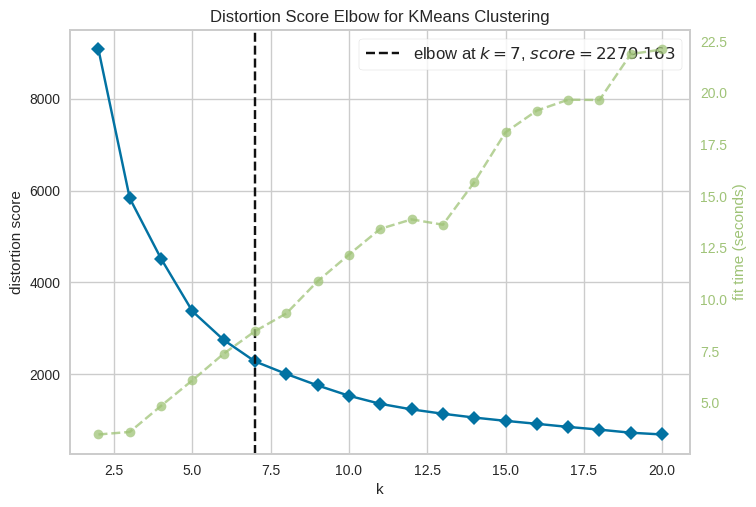

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(scaled_Data)   
visualizer.show()

#### Silhouette Coefficient Method

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 2, Silhouette Score: 0.843, Change from Previous Cluster: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 3, Silhouette Score: 0.792, Change from Previous Cluster: -0.051


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 4, Silhouette Score: 0.791, Change from Previous Cluster: -0.001


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 5, Silhouette Score: 0.702, Change from Previous Cluster: -0.089


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 6, Silhouette Score: 0.593, Change from Previous Cluster: -0.109


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 7, Silhouette Score: 0.595, Change from Previous Cluster: 0.002


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 8, Silhouette Score: 0.563, Change from Previous Cluster: -0.032


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 9, Silhouette Score: 0.578, Change from Previous Cluster: 0.015


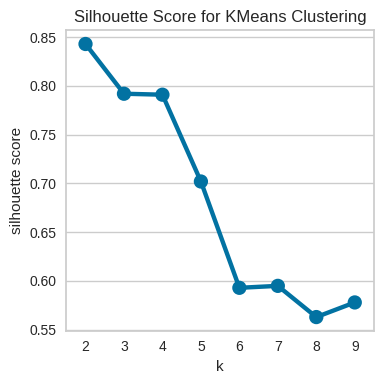

In [35]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, 
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()
            
optimal_kmeans(scaled_Data, 2, 10) 

### Observation
The Elbow method and Silhouette method are two different methods for finding the optimal number of clusters in a dataset. The Elbow method looks for a point in the elbow curve where the average distance between points in a cluster and the cluster centroid starts to decrease rapidly. The Silhouette method looks at the average silhouette score for each point in a cluster, where the silhouette score is a measure of how similar a point is to its own cluster compared to other clusters.

In our case, the Elbow method suggests 7 clusters, while the Silhouette method suggests 3 clusters. There is no definitive answer to which method we should use, as both methods have their own advantages and disadvantages.

The Elbow method is relatively easy to understand and implement, but it can be sensitive to noise in the data. The Silhouette method is more complex to understand and implement, but it is less sensitive to noise in the data.

Ultimately, the best way to choose between the Elbow method and the Silhouette method is to experiment with both methods on our dataset and see which one produces the best results.

### Using Seven Clusters

In [67]:
from sklearn.cluster import KMeans


k = 7
kmeans = KMeans(n_clusters=k,init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(scaled_Data)


KMeans(max_iter=100, n_clusters=7, random_state=42)

In [68]:
labels = kmeans.predict(scaled_Data)
print(labels)

[3 3 3 ... 3 3 3]


In [69]:
df_finall['cluster']= labels
df_finall['score'] = df_userscore['score']

In [70]:
df_finall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198974 entries, 0 to 198973
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   authorized_flag       198974 non-null  object 
 1   city_id               198974 non-null  object 
 2   category_1            198974 non-null  object 
 3   category_3            198974 non-null  object 
 4   merchant_category_id  198974 non-null  object 
 5   category_2            198974 non-null  object 
 6   ref_date              198974 non-null  float64
 7   purchase_day          198974 non-null  int8   
 8   purchase_week         198974 non-null  int8   
 9   purchase_dayofyear    198974 non-null  int16  
 10  purchase_year         198974 non-null  uint16 
 11  purchase_month        198974 non-null  int8   
 12  purchase_time         198974 non-null  float64
 13  installments          198974 non-null  object 
 14  purchase_amount       198974 non-null  float64
 15  

In [73]:
df_finall.groupby('cluster').score.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,28548.0,-0.350052,3.742657,-33.219281,-0.863366,-0.020963,0.777972,13.350895
1,5806.0,-0.333043,3.569641,-33.219281,-0.889220,-0.035255,0.779992,9.187550
2,11653.0,-0.408940,3.760387,-33.219281,-0.909737,-0.046090,0.714908,12.446566
3,136352.0,-0.404336,3.893934,-33.219281,-0.884524,-0.021705,0.766340,17.965068
4,7439.0,-0.387810,3.782953,-33.219281,-0.906640,-0.032181,0.777957,17.675716
5,6840.0,-0.384043,3.841079,-33.219281,-0.868691,-0.011228,0.766414,11.759035
6,2336.0,-0.414081,3.800670,-33.219281,-0.888522,-0.048378,0.783820,8.972549


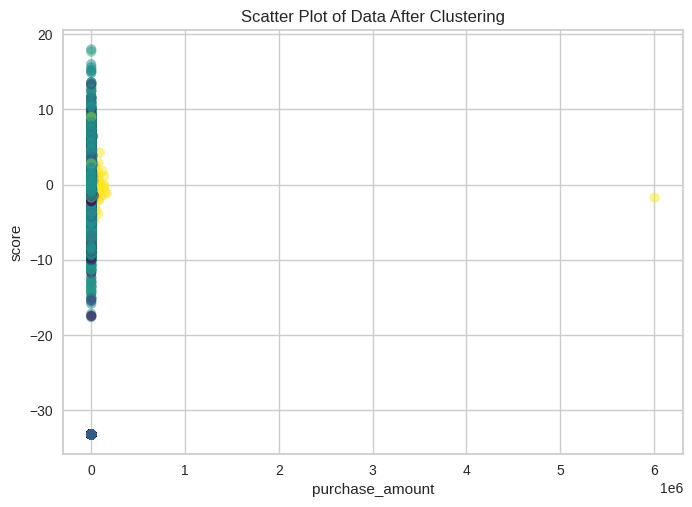

In [39]:
# Create the scatter plot
import matplotlib.cm as cm
plt.scatter(df_finall['purchase_amount'], df_finall['score'], c=df_finall['cluster'],cmap=cm.viridis, alpha=0.5)
plt.xlabel('purchase_amount')
plt.ylabel('score')
plt.title('Scatter Plot of Data After Clustering')
plt.show()

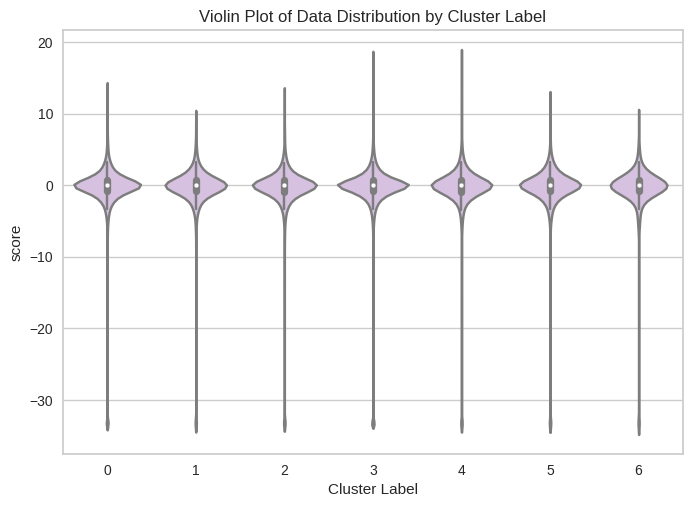

In [40]:
import seaborn as sns

# Create the violin plot
sns.violinplot(x='cluster', y='score', data=df_finall, vert=False, showmedians=True, showextrema=False, widths=1, color='#D8BCE6')
plt.xlabel('Cluster Label')
plt.ylabel('score')
plt.title('Violin Plot of Data Distribution by Cluster Label')
plt.show()

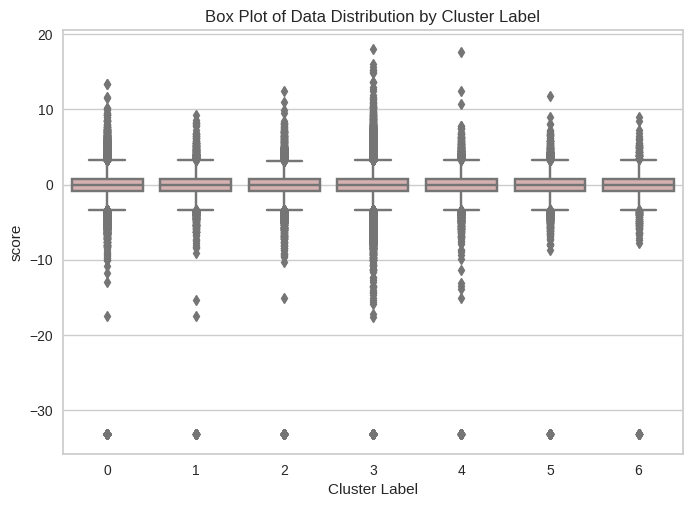

In [41]:
# Plot the box plot
sns.boxplot(x = 'cluster', y = 'score',data = df_finall,  color='#DBACAB')
plt.xlabel('Cluster Label')
plt.ylabel('score')
plt.title('Box Plot of Data Distribution by Cluster Label')
# Show the plot
plt.show()

<Axes: xlabel='cluster', ylabel='count'>

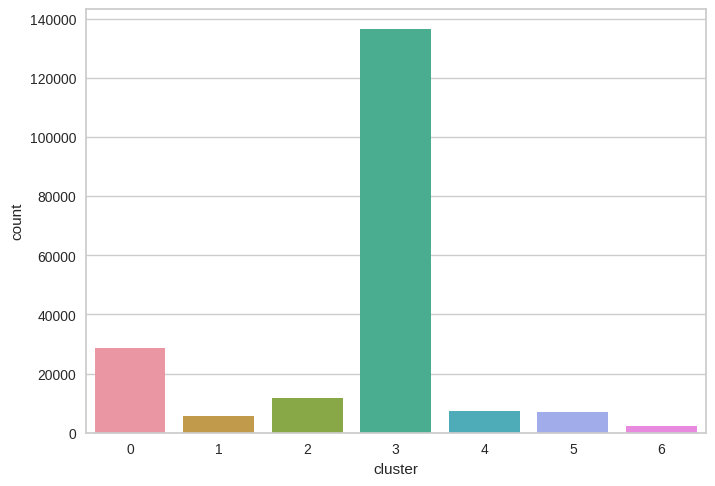

In [42]:
import seaborn as sns


sns.countplot(x='cluster', data=df_finall)

In [43]:
cluster_counts = df_finall['cluster'].value_counts()
cluster_counts

cluster
3    136352
0     28548
2     11653
4      7439
5      6840
1      5806
6      2336
Name: count, dtype: int64

In [44]:
# df_finall = df_finall[df_finall['cluster'] != 1]

In [45]:
result = pd.DataFrame() 
result['mean_loyalty_score'] = df_finall.groupby('cluster')['score'].mean()
result['median_loyalty_score'] = df_finall.groupby('cluster')['score'].median()
result['std_loyalty_score'] = df_finall.groupby('cluster')['score'].std()

In [46]:
result

,mean_loyalty_score,median_loyalty_score,std_loyalty_score
cluster,,,
0,-0.350052,-0.020963,3.742657
1,-0.333043,-0.035255,3.569641
2,-0.408940,-0.046090,3.760387
3,-0.404336,-0.021705,3.893934
4,-0.387810,-0.032181,3.782953
5,-0.384043,-0.011228,3.841079
6,-0.414081,-0.048378,3.800670


<Axes: title={'center': 'Distripution of data for 7 Clusters'}>

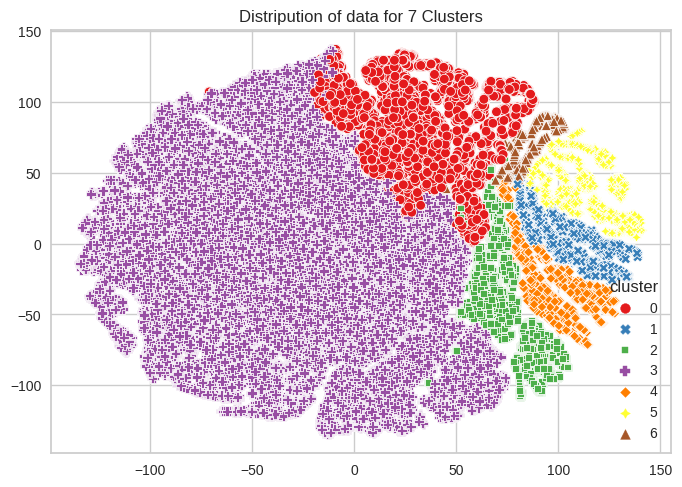

In [47]:
from sklearn.manifold import TSNE
# Initialise TSNE
clusters_number = 7
test = scaled_Data.copy()
# test = test.drop(['score', 'cluster'], axis=1)
TSNE_model = TSNE(random_state=1)
Data = TSNE_model.fit_transform(test)

# Plot t-SNE
plt.title('Distripution of data for {} Clusters'.format(clusters_number))
sns.scatterplot(x=Data[:,0], y=Data[:,1], 
                hue=df_finall['cluster'], style=df_finall['cluster'], palette="Set1")

### Using Three Clusters

In [48]:
from sklearn.cluster import KMeans


k = 3
kmeans = KMeans(n_clusters=k,init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(scaled_Data)


KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=42)

In [49]:
labels = kmeans.predict(scaled_Data)
print(labels)

[0 0 0 ... 0 0 0]


In [50]:
df_finall['cluster']= labels
df_finall['score'] = df_userscore['score']

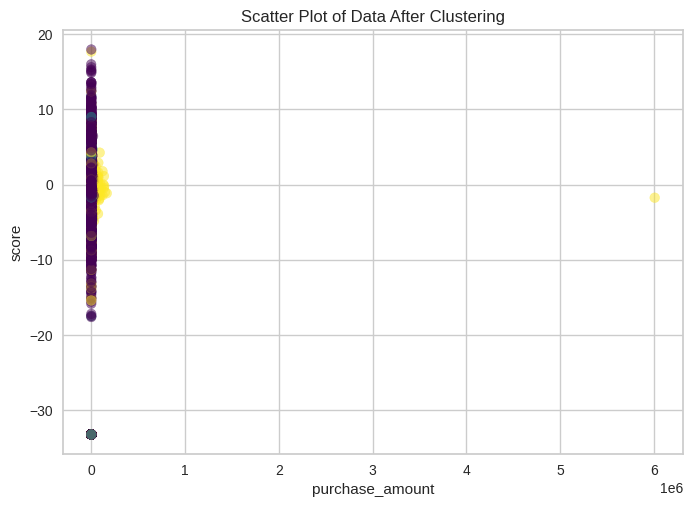

In [51]:
# Create the scatter plot
import matplotlib.cm as cm
plt.scatter(df_finall['purchase_amount'], df_finall['score'], c=df_finall['cluster'],cmap=cm.viridis, alpha=0.5)
plt.xlabel('purchase_amount')
plt.ylabel('score')
plt.title('Scatter Plot of Data After Clustering')
plt.show()

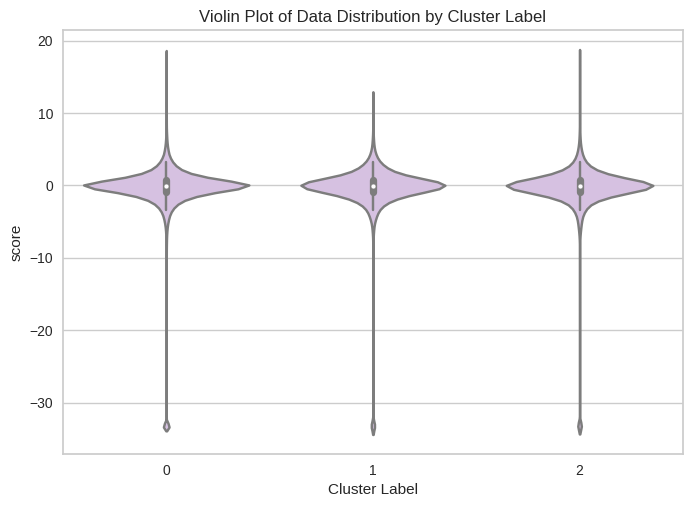

In [52]:
import seaborn as sns

# Create the violin plot
sns.violinplot(x='cluster', y='score', data=df_finall, vert=False, showmedians=True, showextrema=False, widths=1, color='#D8BCE6')
plt.xlabel('Cluster Label')
plt.ylabel('score')
plt.title('Violin Plot of Data Distribution by Cluster Label')
plt.show()

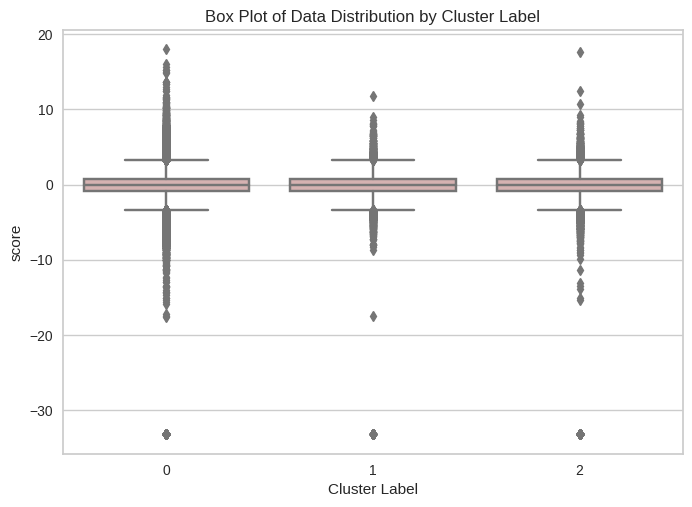

In [53]:
# Plot the box plot
sns.boxplot(x = 'cluster', y = 'score',data = df_finall,  color='#DBACAB')
plt.xlabel('Cluster Label')
plt.ylabel('score')
plt.title('Box Plot of Data Distribution by Cluster Label')
# Show the plot
plt.show()

<Axes: xlabel='cluster', ylabel='count'>

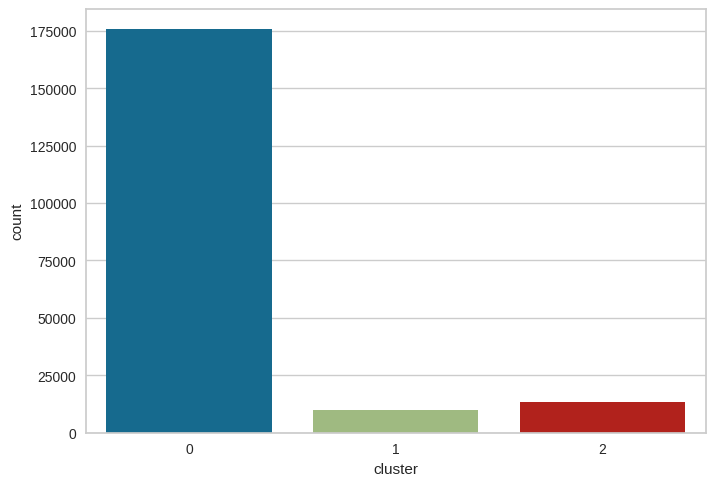

In [54]:
import seaborn as sns


sns.countplot(x='cluster', data=df_finall)

In [55]:
cluster_counts = df_finall['cluster'].value_counts()
cluster_counts

cluster
0    175622
2     13316
1     10036
Name: count, dtype: int64

In [56]:
# df_finall = df_finall[df_finall['cluster'] != 1]

In [57]:
result = pd.DataFrame() 
result['mean_loyalty_score'] = df_finall.groupby('cluster')['score'].mean()
result['median_loyalty_score'] = df_finall.groupby('cluster')['score'].median()
result['std_loyalty_score'] = df_finall.groupby('cluster')['score'].std()

In [58]:
result

,mean_loyalty_score,median_loyalty_score,std_loyalty_score
cluster,,,
0,-0.395715,-0.023427,3.861050
1,-0.370211,-0.012479,3.764363
2,-0.382381,-0.038907,3.746708


In [59]:
centers = np.array(kmeans.cluster_centers_)

<Axes: title={'center': 'Distripution of data for 3 Clusters'}>

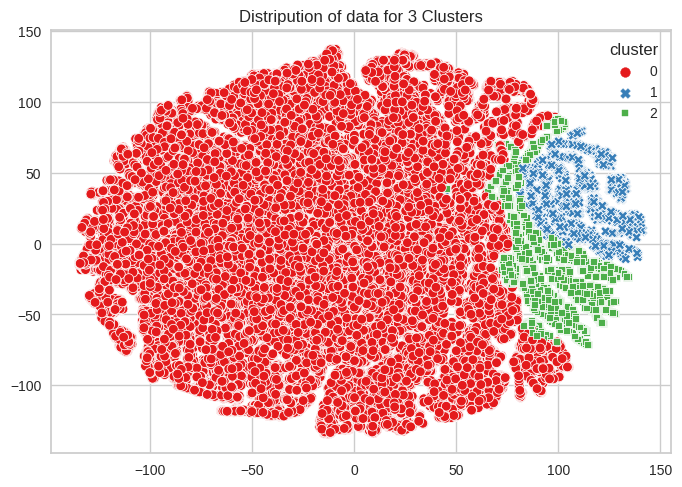

In [60]:
from sklearn.manifold import TSNE
# Initialise TSNE
clusters_number = 3
test = scaled_Data.copy()
# test = test.drop(['score', 'cluster'], axis=1)
TSNE_model = TSNE(random_state=1)
Data = TSNE_model.fit_transform(test)

# Plot t-SNE
plt.title('Distripution of data for {} Clusters'.format(clusters_number))
sns.scatterplot(x=Data[:,0], y=Data[:,1], 
                hue=df_finall['cluster'], style=df_finall['cluster'], palette="Set1")

# Observation For Question One 
- From all of the above we can say that the best number of cluster for our dataset is :  **7** 
- From the graph we can see that some clusters have high number of data and some of them have small numbere of data that may happen because that there
- according to purchase amount each cluster has a different average value for a particular variable, and different levels of variation in the data.
- For purchase amount some clusters have higher average values than others, while some have lower average values.
- We can say that the data is highly impalanced so the output of the clusters is not so accurate 
- we tried to be specific when we select futures we used. for that most of our columns is from trnsaction data only it is the best columns to cluster users based on their spending behaviors.

# Question Two
Based on your results from Q1, report the statistics of loyalty
scores for each cluster of users. Report your findings.

In [73]:
df_finall.groupby('cluster').score.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,28548.0,-0.350052,3.742657,-33.219281,-0.863366,-0.020963,0.777972,13.350895
1,5806.0,-0.333043,3.569641,-33.219281,-0.889220,-0.035255,0.779992,9.187550
2,11653.0,-0.408940,3.760387,-33.219281,-0.909737,-0.046090,0.714908,12.446566
3,136352.0,-0.404336,3.893934,-33.219281,-0.884524,-0.021705,0.766340,17.965068
4,7439.0,-0.387810,3.782953,-33.219281,-0.906640,-0.032181,0.777957,17.675716
5,6840.0,-0.384043,3.841079,-33.219281,-0.868691,-0.011228,0.766414,11.759035
6,2336.0,-0.414081,3.800670,-33.219281,-0.888522,-0.048378,0.783820,8.972549


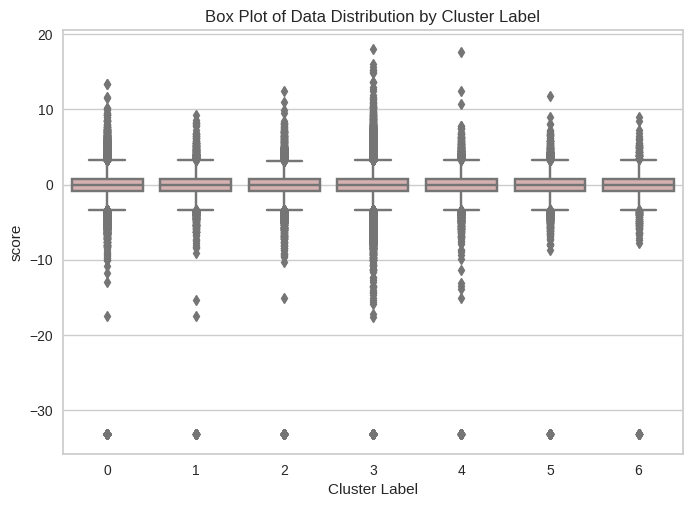

In [41]:
# Plot the box plot
sns.boxplot(x = 'cluster', y = 'score',data = df_finall,  color='#DBACAB')
plt.xlabel('Cluster Label')
plt.ylabel('score')
plt.title('Box Plot of Data Distribution by Cluster Label')
# Show the plot
plt.show()

# Observation for question two

- As we can see, the mean score for each cluster is relatively close, but there is some variation.
- Cluster 0 has the lowest mean score, while cluster 3 has the highest mean score. 
- The standard deviation for each cluster is also relatively close, which indicates that the scores within each cluster are fairly evenly distributed. 
- The minimum score for each cluster is -33.219281, which is the lowest possible score. 
- The maximum score for each cluster varies, but it is clear that some clusters have higher maximum scores than others. 
- This suggests that there is some variation in the quality of the data within each cluster.

# Question Three
Discuss whether you need to reduce the dimensions to
improve clustering performance and build another clustering model (if
you believe dimension reduction would help, you can apply it or choose
another clustering method) to improve your analysis from Q1. You should
explain why the resultant clusters are better than the ones you got in Q1.

## Using Dimmentionality Reduction (PCA)

In [95]:
df_finall = df_finall.drop(['score', 'cluster'], axis=1)

In [84]:
from sklearn.decomposition import PCA

# Create the PCA object
pca = PCA(2)

# Fit the PCA object to the data
pca.fit(scaled_Data)

# Transform the data
transformed_data = pca.transform(scaled_Data)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.85038108 0.08160193]


### Find the best number of cluster

#### **The Elbow Method** 

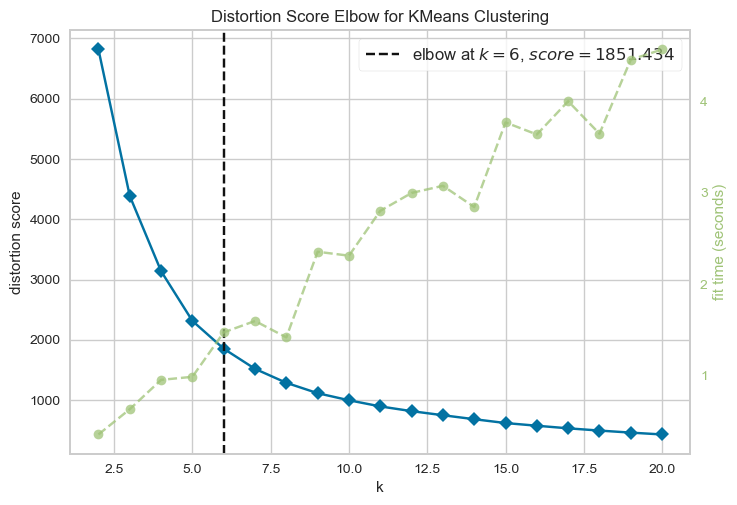

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(transformed_data)   
visualizer.show()

#### Silhouette Coefficient Method

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 2, Silhouette Score: 0.843, Change from Previous Cluster: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 3, Silhouette Score: 0.792, Change from Previous Cluster: -0.051


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 4, Silhouette Score: 0.79, Change from Previous Cluster: -0.002


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 5, Silhouette Score: 0.702, Change from Previous Cluster: -0.088


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 6, Silhouette Score: 0.592, Change from Previous Cluster: -0.11


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 7, Silhouette Score: 0.595, Change from Previous Cluster: 0.003


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 8, Silhouette Score: 0.563, Change from Previous Cluster: -0.032


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 9, Silhouette Score: 0.566, Change from Previous Cluster: 0.003


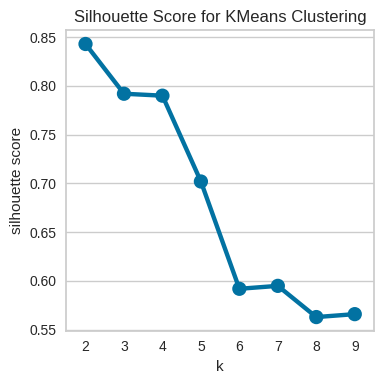

In [64]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, 
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()
            
optimal_kmeans(transformed_data, 2, 10) 

> **As the above The Elbow method and Silhouette method give two different number of clusters So we will try both and see what is the best number of clusters.** 


### Using Seven Clusters

In [86]:
from sklearn.cluster import KMeans


k = 6
kmeans = KMeans(n_clusters=k,init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(transformed_data)


KMeans(max_iter=100, n_clusters=6, random_state=42)

In [87]:
labels = kmeans.predict(transformed_data)
print(labels)

[0 0 0 ... 0 0 0]


In [88]:
transformed_data = pd.DataFrame(transformed_data)
transformed_data['cluster']= labels
transformed_data['score'] = df_userscore['score']

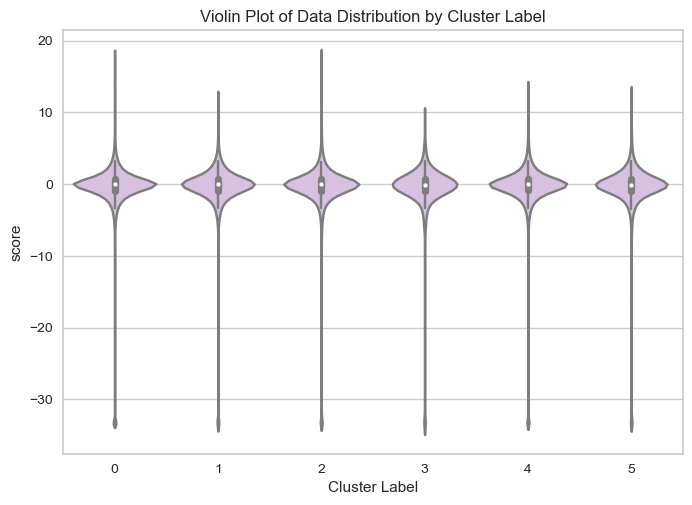

In [98]:
import seaborn as sns

# Create the violin plot
sns.violinplot(x='cluster', y='score', data=transformed_data, vert=False, showmedians=True, showextrema=False, widths=1, color='#D8BCE6')
plt.xlabel('Cluster Label')
plt.ylabel('score')
plt.title('Violin Plot of Data Distribution by Cluster Label')
plt.show()

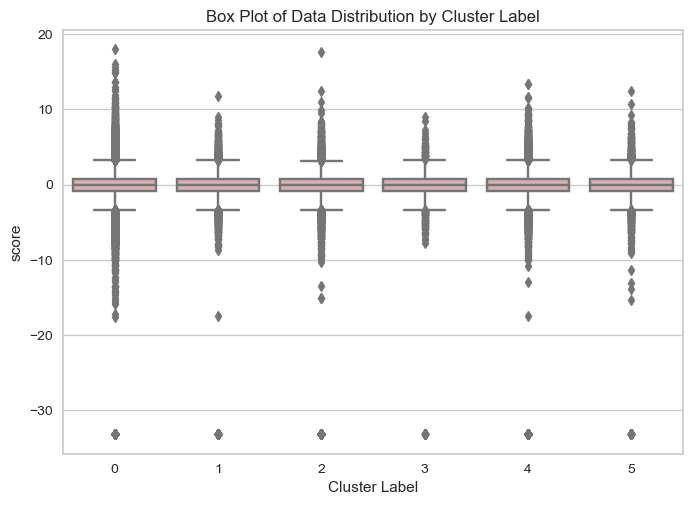

In [99]:
# Plot the box plot
sns.boxplot(x = 'cluster', y = 'score',data = transformed_data,  color='#DBACAB')
plt.xlabel('Cluster Label')
plt.ylabel('score')
plt.title('Box Plot of Data Distribution by Cluster Label')
# Show the plot
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='count'>

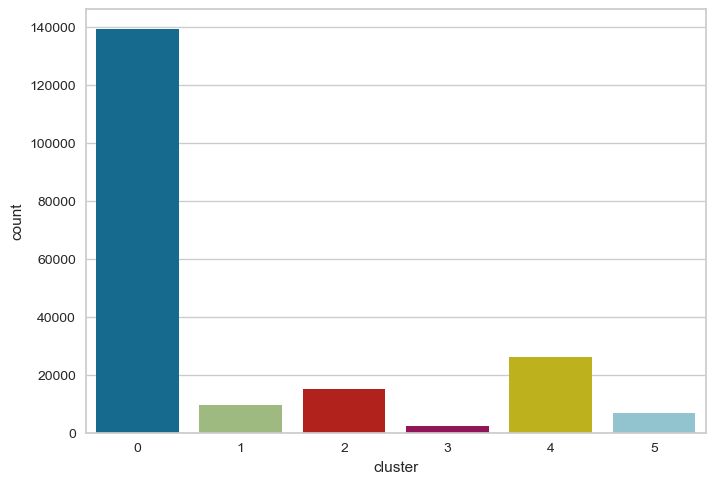

In [100]:
import seaborn as sns


sns.countplot(x='cluster', data=transformed_data)

In [101]:
cluster_counts = transformed_data['cluster'].value_counts()
cluster_counts

0    139215
4     26076
2     15094
1      9600
5      6761
3      2228
Name: cluster, dtype: int64

In [102]:
# df_finall = df_finall[df_finall['cluster'] != 1]

In [103]:
result = pd.DataFrame() 
result['mean_loyalty_score'] = transformed_data.groupby('cluster')['score'].mean()
result['median_loyalty_score'] = transformed_data.groupby('cluster')['score'].median()
result['std_loyalty_score'] = transformed_data.groupby('cluster')['score'].std()

In [104]:
result

,mean_loyalty_score,median_loyalty_score,std_loyalty_score
cluster,,,
0,-0.403085,-0.019926,3.893323
1,-0.375960,-0.016955,3.771055
2,-0.412604,-0.036332,3.815285
3,-0.453576,-0.057024,3.942325
4,-0.346655,-0.026397,3.710696
5,-0.340331,-0.047763,3.588923


<AxesSubplot:title={'center':'Distripution of data for 6 Clusters'}, xlabel='0', ylabel='1'>

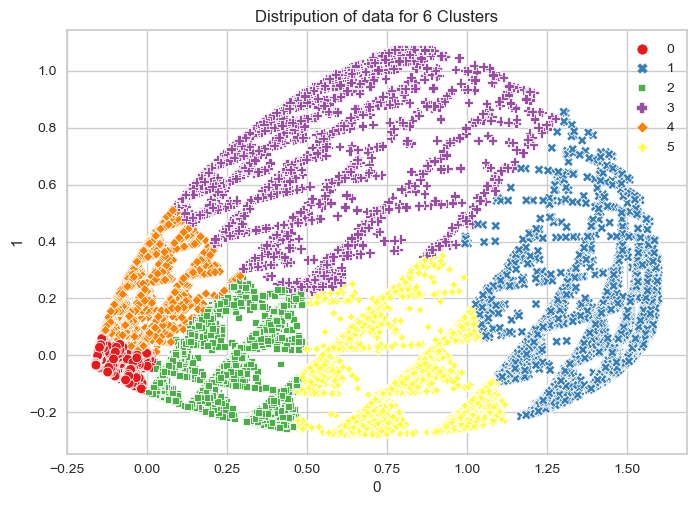

In [97]:
from sklearn.manifold import TSNE
# Initialise TSNE
clusters_number = 6
# test = scaled_Data.copy()
# # test = test.drop(['score', 'cluster'], axis=1)
# TSNE_model = TSNE(random_state=1)
# Data = TSNE_model.fit_transform(test)

# Plot t-SNE
plt.title('Distripution of data for {} Clusters'.format(clusters_number))
sns.scatterplot(x=transformed_data. iloc[:,0], y=transformed_data. iloc[:,1], 
                hue=labels, style=labels, palette="Set1")

# Observation of question three
As we can see the clusers when we use PCA is better than withoutusing it as it improved clustering performance and make the clusers more informative 

# Question Four
Based on your results from Q3 report the statistics of loyalty
scores for each cluster of users. Report your findings.

In [105]:
df_finall['cluster']= labels
df_finall['score'] = df_userscore['score']

In [106]:
df_finall.groupby('cluster').score.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,139215.0,-0.403085,3.893323,-33.219281,-0.882785,-0.019926,0.767339,17.965068
1,9600.0,-0.375960,3.771055,-33.219281,-0.885217,-0.016955,0.773305,11.759035
2,15094.0,-0.412604,3.815285,-33.219281,-0.902779,-0.036332,0.725553,17.675716
3,2228.0,-0.453576,3.942325,-33.219281,-0.898309,-0.057024,0.778512,8.972549
4,26076.0,-0.346655,3.710696,-33.219281,-0.866995,-0.026397,0.775681,13.350895
5,6761.0,-0.340331,3.588923,-33.219281,-0.904589,-0.047763,0.777327,12.385323


# Observation for question four
- lIKE IN Q2, the mean score for each cluster is relatively close, but there is some variation.
- Cluster 0 has the lowest mean score, while cluster 2 has the highest mean score.
- The standard deviation for each cluster is also relatively close, which indicates that the scores within each cluster are fairly evenly distributed.
- So we can notice that the distribution of score almost the same when we use PCA or without using it

# Question Five
Use frequent pattern mining to find frequently co-occurring
transaction types. Report your findings and justify how you pick the min
support threshold.

# Frequent Patteren 

In [277]:
df_new_merchant_trans = reduce_memory_usage(pd.read_csv('new_merchant_transactions.csv'))

Mem. usage decreased to 136.66 Mb (34.8% reduction)


In [279]:
df_new_merchant_trans[df_new_merchant_trans['card_id'] == 'C_ID_415bb3a509']

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8


In [115]:
df_hist_trans = reduce_memory_usage(pd.read_csv('df_hist_trans.csv'))
df_new_merchant_trans = reduce_memory_usage(pd.read_csv('df_new_merchant_trans.csv'))


Mem. usage decreased to 3303.88 Mb (35.3% reduction)
Mem. usage decreased to 222.78 Mb (35.3% reduction)


In [116]:
df_hist_trans[['merchant_category_id']] = df_hist_trans[['merchant_category_id']].astype('object')
df_new_merchant_trans[['merchant_category_id']] = df_new_merchant_trans[['merchant_category_id']].astype('object')


In [118]:
df_hist_trans= df_hist_trans[['card_id','merchant_category_id']]
df_new_merchant_trans =df_new_merchant_trans[['card_id','merchant_category_id']]

In [119]:
df = pd.concat([df_new_merchant_trans, df_hist_trans])
## Here we will join (left join) between all transaction data and merchant data 
# df = pd.merge(result, df_merchant, on='merchant_id')


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31075392 entries, 0 to 29112360
Data columns (total 2 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   card_id               object
 1   merchant_category_id  object
dtypes: object(2)
memory usage: 711.3+ MB


In [62]:
del df_hist_trans
del df_new_merchant_trans


In [121]:
df = df.groupby('card_id')['merchant_category_id'].agg('unique').apply(list)

In [123]:
from mlxtend.preprocessing import TransactionEncoder


In [124]:
encoder =  TransactionEncoder()
Transactio_arry = encoder.fit(df).transform(df)
Transactio_df = pd.DataFrame(Transactio_arry, columns=encoder.columns_)

In [125]:
from mlxtend.frequent_patterns import apriori

# # Create the apriori object
for min_supportID in [0.2,0.4,0.6,0.8]:
    apriori_obj = apriori(Transactio_df, min_support=min_supportID,use_colnames=True)
    print('The min support is',min_supportID)
    print('------------'*15)
    apriori_obj.sort_values("support",ascending=False)


The min support is 0.2
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
25,0.900,(705)
12,0.767,(367)
27,0.766,(879)
141,0.732,"(705, 367)"
9,0.722,(307)
...,...,...
241,0.200,"(506, 68, 879)"
173,0.200,"(705, 518)"
1615,0.200,"(705, 68, 683, 879, 80, 278)"
647,0.200,"(80, 690, 68, 278)"


The min support is 0.4
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
9,0.900,(705)
4,0.767,(367)
10,0.766,(879)
34,0.732,"(705, 367)"
3,0.722,(307)
...,...,...
48,0.402,"(560, 80, 278)"
12,0.402,"(705, 68)"
103,0.401,"(705, 879, 80, 307, 278)"
101,0.400,"(705, 683, 367, 879)"


The min support is 0.6
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
4,0.900,(705)
3,0.767,(367)
5,0.766,(879)
9,0.732,"(705, 367)"
2,0.722,(307)
11,0.706,"(705, 879)"
8,0.684,"(705, 307)"
1,0.678,(278)
0,0.662,(80)
7,0.648,"(705, 278)"


The min support is 0.8
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
0,0.900,(705)


# Observation Of Question Five
- After we tried different min support threshold we can see that the best threshold is **0.6** As is returen most of patterens in the data
- To find frequently co-occurring transaction types we decide to only use merchant_category_id from the transaction data As we belive it describe the category which from it we can notice the patteren of the transaction type.

# Question Six
Redo Q5 by splitting users based on their loyalty scores.
The goal is to explore if different frequent patterns exist in users with
high/low loyalty scores.


### On Different Loyalty Score

In [26]:
df_hist_trans = reduce_memory_usage(pd.read_csv('df_hist_trans.csv'))
df_new_merchant_trans = reduce_memory_usage(pd.read_csv('df_new_merchant_trans.csv'))


Mem. usage decreased to 3081.77 Mb (36.9% reduction)
Mem. usage decreased to 207.80 Mb (36.9% reduction)


In [27]:
df_hist_trans= df_hist_trans[['merchant_category_id','card_id']]
df_new_merchant_trans =df_new_merchant_trans[['merchant_category_id','card_id']]

In [126]:
df_userscore = reduce_memory_usage( pd.read_csv('df_userscore.csv'))

Mem. usage decreased to  5.97 Mb (44.6% reduction)


In [127]:
df_userscore =df_userscore[['score','card_id']]

In [128]:
result = pd.concat([df_new_merchant_trans, df_hist_trans])
## Here we will join (inner join) between all transaction data and user score data 
df = pd.merge(result, df_userscore, on='card_id')

In [31]:
del df_hist_trans
del df_new_merchant_trans
del result
del df_userscore

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19249694 entries, 0 to 19249693
Data columns (total 3 columns):
 #   Column                Dtype  
---  ------                -----  
 0   card_id               object 
 1   merchant_category_id  object 
 2   score                 float64
dtypes: float64(1), object(2)
memory usage: 587.5+ MB


In [35]:
df.describe()

,score
count,1.924969e+07
mean,-4.555357e-01
std,3.581071e+00
min,-3.321928e+01
25%,-8.080842e-01
50%,-9.017618e-02
75%,5.422310e-01
max,1.796507e+01


<Axes: >

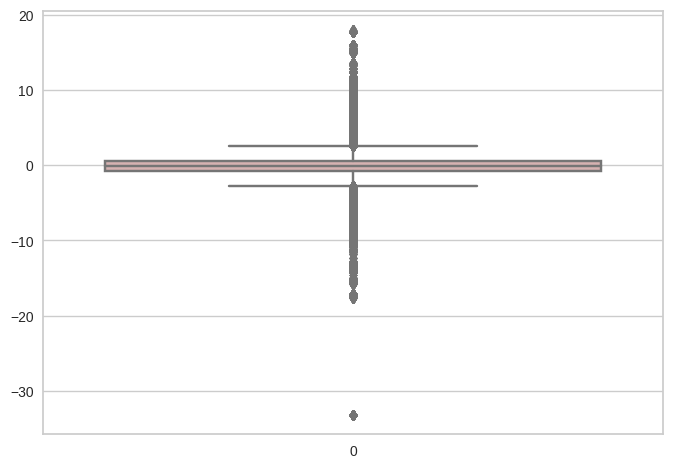

In [33]:
import seaborn as sns

sns.boxplot(df['score'],  color='#DBACAB')

In [130]:
High_loyalty_Score = df[df['score'] >= -9.017618e-02].copy()
low_loyalty_Score = df[df['score'] < -9.017618e-02].copy()

In [131]:
High_loyalty_Score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9624852 entries, 208 to 19249691
Data columns (total 3 columns):
 #   Column                Dtype  
---  ------                -----  
 0   card_id               object 
 1   merchant_category_id  object 
 2   score                 float64
dtypes: float64(1), object(2)
memory usage: 293.7+ MB


In [132]:
High_loyalty_Score = High_loyalty_Score.drop(['score'], axis=1)

In [133]:
High_loyalty_Score[['merchant_category_id']] = High_loyalty_Score[['merchant_category_id']].astype('object')


In [134]:
High_loyalty_Score = High_loyalty_Score.groupby('card_id')['merchant_category_id'].agg('unique').apply(list)

In [135]:
encoder =  TransactionEncoder()
Transactio_arry = encoder.fit(High_loyalty_Score).transform(High_loyalty_Score)
HTransactio_df = pd.DataFrame(Transactio_arry, columns=encoder.columns_)

In [136]:
# # Create the apriori object
for min_supportID in [0.2,0.4,0.6,0.8]:
    apriori_obj = apriori(HTransactio_df, min_support=min_supportID,use_colnames=True)
    print('The min support is',min_supportID)
    print('------------'*15)
    apriori_obj.sort_values("support",ascending=False)

The min support is 0.2
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
25,0.889,(705)
12,0.750,(367)
27,0.749,(879)
130,0.713,"(705, 367)"
9,0.707,(307)
...,...,...
346,0.200,"(222, 278, 367)"
282,0.200,"(80, 690, 422)"
1279,0.200,"(705, 367, 560, 80, 307, 884)"
552,0.200,"(560, 80, 68, 278)"


The min support is 0.4
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
8,0.889,(705)
4,0.750,(367)
9,0.749,(879)
32,0.713,"(705, 367)"
3,0.707,(307)
...,...,...
0,0.408,(68)
25,0.405,"(560, 307)"
65,0.405,"(705, 307, 683)"
84,0.402,"(705, 879, 80, 367, 278)"


The min support is 0.6
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
4,0.889,(705)
3,0.750,(367)
5,0.749,(879)
9,0.713,"(705, 367)"
2,0.707,(307)
10,0.686,"(705, 879)"
8,0.667,"(705, 307)"
1,0.658,(278)
0,0.644,(80)
7,0.626,"(705, 278)"


The min support is 0.8
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
0,0.889,(705)


> **Now we will try to find frequent patteren in low loyalty score**

In [137]:
low_loyalty_Score = low_loyalty_Score.drop(['score'], axis=1)

In [138]:
low_loyalty_Score[['merchant_category_id']] = low_loyalty_Score[['merchant_category_id']].astype('object')


In [139]:
low_loyalty_Score = low_loyalty_Score.groupby('card_id')['merchant_category_id'].agg('unique').apply(list)

In [140]:
encoder =  TransactionEncoder()
Transactio_arry = encoder.fit(low_loyalty_Score).transform(low_loyalty_Score)
LTransactio_df = pd.DataFrame(Transactio_arry, columns=encoder.columns_)

In [141]:
# # Create the apriori object
for min_supportID in [0.2,0.4,0.6,0.8]:
    apriori_obj = apriori(LTransactio_df, min_support=min_supportID,use_colnames=True)
    print('The min support is',min_supportID)
    print('------------'*15)
    apriori_obj.sort_values("support",ascending=False)

The min support is 0.2
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
28,0.912,(705)
13,0.784,(367)
31,0.784,(879)
165,0.753,"(705, 367)"
10,0.738,(307)
...,...,...
1783,0.200,"(705, 842, 683, 80, 307)"
2230,0.200,"(705, 879, 560, 561, 80, 278)"
1917,0.200,"(705, 422, 683, 307, 278)"
350,0.200,"(80, 419, 367)"


The min support is 0.4
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
10,0.912,(705)
4,0.784,(367)
11,0.784,(879)
38,0.753,"(705, 367)"
3,0.738,(307)
...,...,...
124,0.405,"(560, 705, 278, 879)"
81,0.404,"(705, 690, 278)"
70,0.401,"(307, 683, 278)"
126,0.401,"(560, 705, 307, 367)"


The min support is 0.6
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
4,0.912,(705)
3,0.784,(367)
5,0.784,(879)
12,0.753,"(705, 367)"
2,0.738,(307)
14,0.728,"(705, 879)"
10,0.704,"(705, 307)"
1,0.699,(278)
0,0.683,(80)
8,0.672,"(705, 278)"


The min support is 0.8
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,support,itemsets
0,0.912,(705)


# Observation Of Question Six
- After we tried different min support threshold we can see that the best threshold is **0.6** As is returen most of patterens in the data
- from above resulte we can notice the patteren in the two data set is almost the same but the difference is only one the order.